<a href="https://colab.research.google.com/github/Gr1Lo/trsgi_nets/blob/main/load_from_gh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Чтение репозитория с github

In [ ]:
!rm -r trsgi_nets
!git clone https://github.com/Gr1Lo/trsgi_nets.git

Чтение данных из *.pickle. Если их нет, сохранение в *.pickle из исходных файлов

In [ ]:
%cd trsgi_nets/
%load_ext google.colab.data_table
!pip install pyEOF
!pip install kneed

from clustering import *
from models import *
from read_data import *
from train_test_preparing import *
from utils import *

import os

%cd ..
if os.path.isfile('drive/MyDrive/trsgi_values.pickle'):
    trsgi_values = read_pickle('drive/MyDrive/trsgi_values.pickle')
else:
    trsgi_values = r_execel('drive/MyDrive/breitenmoser2014.xlsx')
    save_pickle('drive/MyDrive/trsgi_values.pickle', trsgi_values)


if os.path.isfile('drive/MyDrive/test.pickle'):
    df_data = read_pickle('drive/MyDrive/test.pickle')
    ds_n = read_pickle('drive/MyDrive/ds_n.pickle')
else:
    df_data, ds_n = r_netCDF('drive/MyDrive/test.nc')
    save_pickle('drive/MyDrive/test.pickle', df_data)
    save_pickle('drive/MyDrive/ds_n.pickle', ds_n) 

/content/trsgi_nets
  Created wheel for pyEOF: filename=pyEOF-0.0.0-py3-none-any.whl size=9364 sha256=8365a28cd5098d99e869db498a7856e9e6649cc792d2e7001fbb205a89290ca9
  Stored in directory: /root/.cache/pip/wheels/87/61/3e/865b808f717a570881db4fdce827cd5155796e03286e17b72f
Successfully built pyEOF
/content


# Формирование тренировочных наборов данных

In [ ]:
pca, eofs, pcs, evfs = eof_an(df_data, ds_n, n = 10)
k_means_val = k_means(pcs, 10, '10 классов для нормализованных значений компонент', use_norm=True)

#наборы для классификации
list_class = []
post_list_class = []
a = list(range(0,6))
a[5] = None

for t_use_norm in (True, False):
    for a_m in a:
      postf = 'class_norm' + str(t_use_norm) + '_augFalse'  + '_use5' + str(a_m)
      var_n = 'tr_t' + postf + ', tr_l' + postf + ', te_t' + postf + ', te_l' + postf + ', v_r' + postf
      #print(var_n)
      exec(var_n + ' = sta_split(trsgi_values, k_means_val, use_norm = ' + str(t_use_norm) + ", type_op = 'class', use_aug = False, use5 = " + str(a_m) + ')')
      exec('list_class.append([' + var_n + '])')
      post_list_class.append(postf)

#наборы для регрессиии
list_regr = []
post_list_regr = []
for t_use_norm in (True, False):
  for t_use_aug in (True, False):
    for a_m in a:
      postf = 'regr_norm' + str(t_use_norm) + '_aug' + str(t_use_aug)  + '_use5' + str(a_m)
      var_n = 'tr_t' + postf + ', tr_l' + postf + ', te_t' + postf + ', te_l' + postf + ', v_r' + postf
      #print(var_n)
      exec(var_n + ' = sta_split(trsgi_values, pcs, use_norm = ' + str(t_use_norm) + ", type_op = 'regr', use_aug = " + str(t_use_aug) + ', use5 = ' + str(a_m) + ')')
      exec('list_regr.append([' + var_n + '])')
      post_list_regr.append(postf)

# Запуск обучения моделей

**Нотация моделей (названия переменных, в которые сохранены модели, указаны над графиком):** <br><br>
*regr* - регрессионная  <br>
class - классификационная <br>
*normTrue/normFalse* - нормированные или ненормированные данные<br>
*augTrue/augFalse* - синтетически расширенный набор данных или нет<br>
*use5<число>* - использовалось ли разделение оп пятилеткам плюс число смещения отсчета (*use5None* - не использовалось)<br>
eof0 - eof не использовались<br>
eof1 - использовались eof<br>
eof2 - использовались примитивы eof<br>

regr_normTrue_augTrue_use50_useEOF0


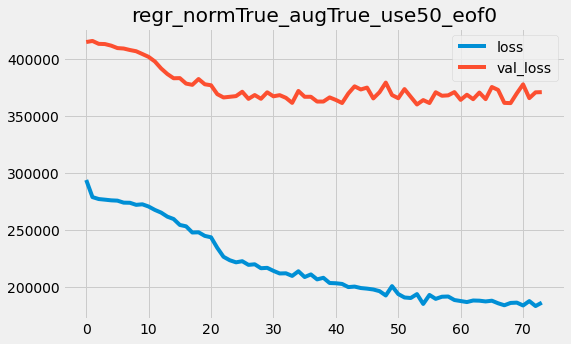

1/1 - 0s - loss: 350627.9375
350627.9375
regr_normTrue_augTrue_use50_useEOF1


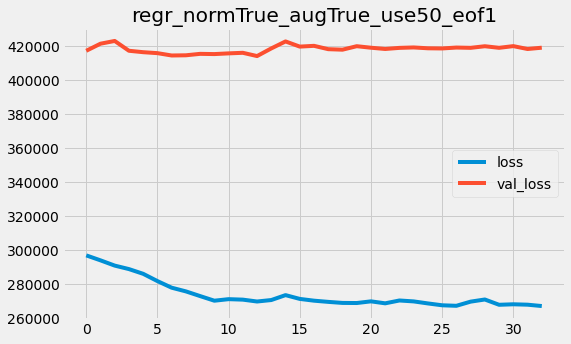

1/1 - 0s - loss: 380219.4375
380219.4375
regr_normTrue_augTrue_use50_useEOF2


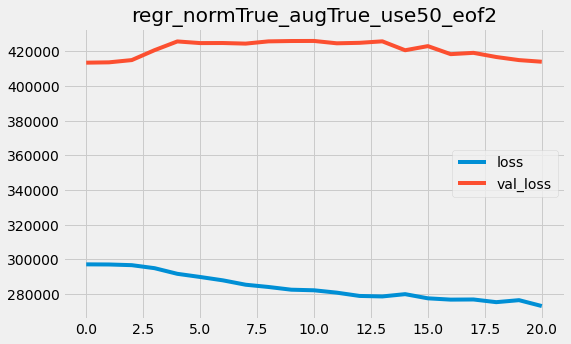

1/1 - 0s - loss: 381826.1562
381826.15625
regr_normTrue_augTrue_use51_useEOF0


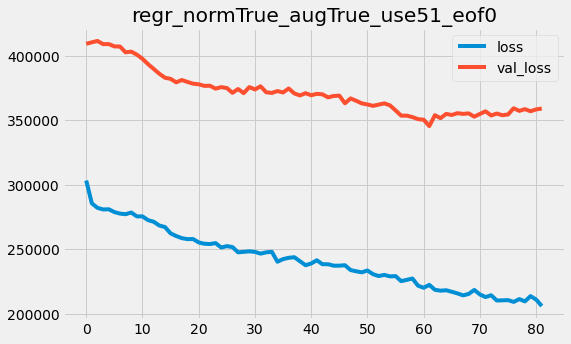

1/1 - 0s - loss: 356368.9062
356368.90625
regr_normTrue_augTrue_use51_useEOF1


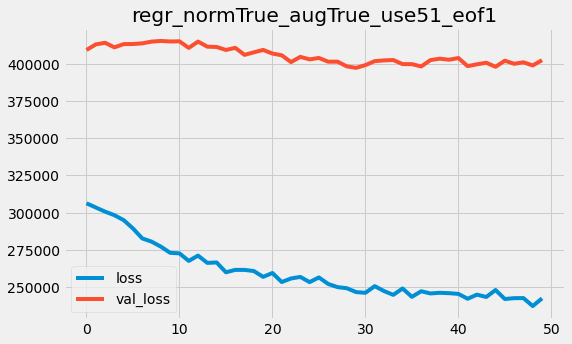

1/1 - 0s - loss: 375487.8125
375487.8125
regr_normTrue_augTrue_use51_useEOF2


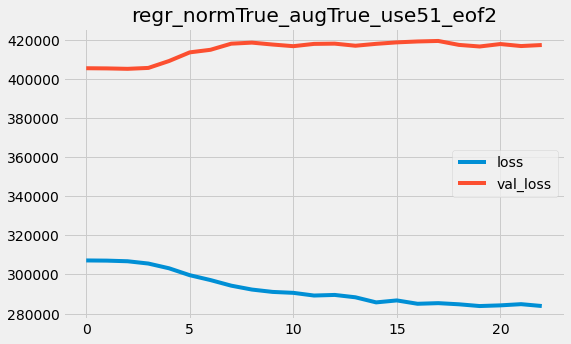

1/1 - 0s - loss: 369726.4688
369726.46875
regr_normTrue_augTrue_use52_useEOF0


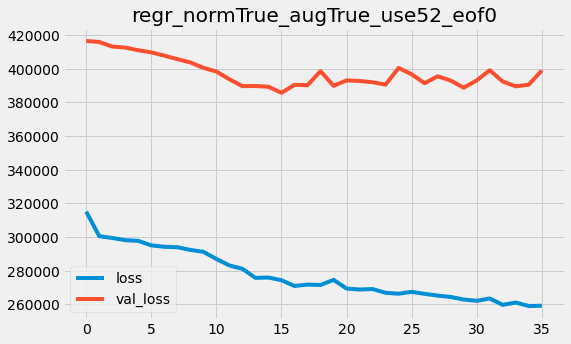

1/1 - 0s - loss: 345607.3438
345607.34375
regr_normTrue_augTrue_use52_useEOF1


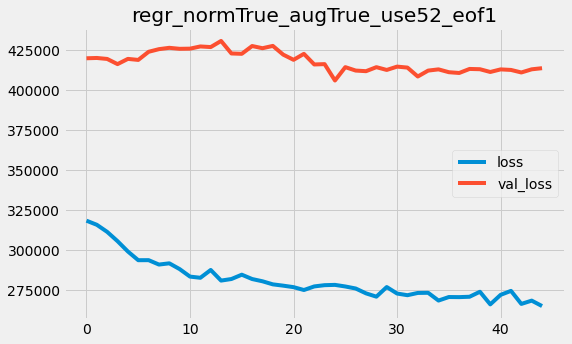

1/1 - 0s - loss: 340981.2812
340981.28125
regr_normTrue_augTrue_use52_useEOF2


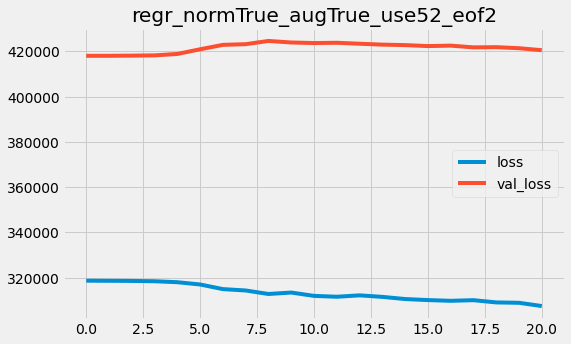

1/1 - 0s - loss: 340326.0000
340326.0
regr_normTrue_augTrue_use53_useEOF0


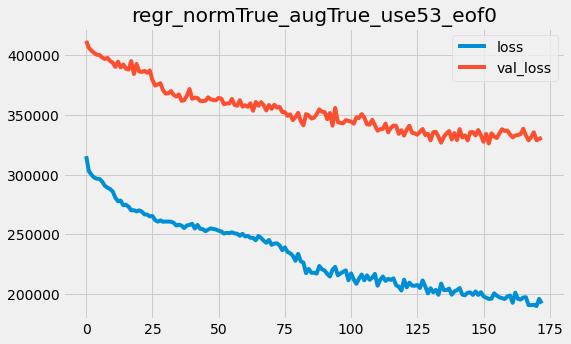

1/1 - 0s - loss: 312998.7812
312998.78125
regr_normTrue_augTrue_use53_useEOF1


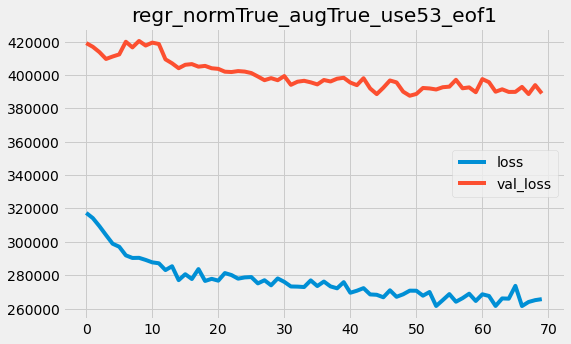

1/1 - 0s - loss: 330857.3750
330857.375
regr_normTrue_augTrue_use53_useEOF2


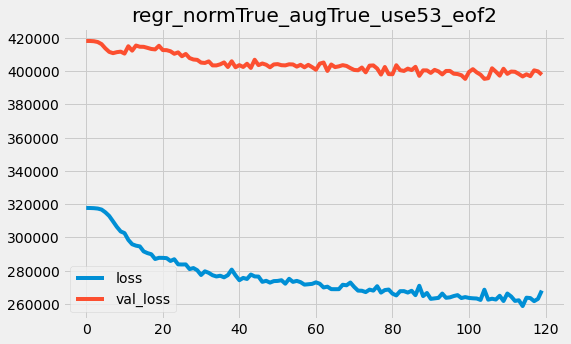

1/1 - 0s - loss: 329019.7188
329019.71875
regr_normTrue_augTrue_use54_useEOF0


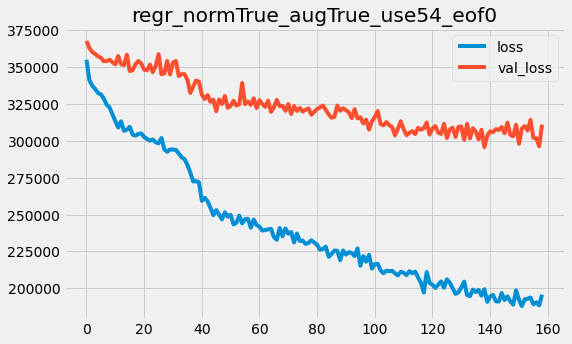

1/1 - 0s - loss: 328143.1250
328143.125
regr_normTrue_augTrue_use54_useEOF1


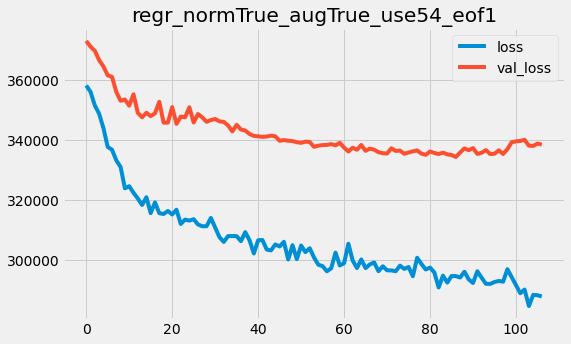

1/1 - 0s - loss: 306437.3750
306437.375
regr_normTrue_augTrue_use54_useEOF2


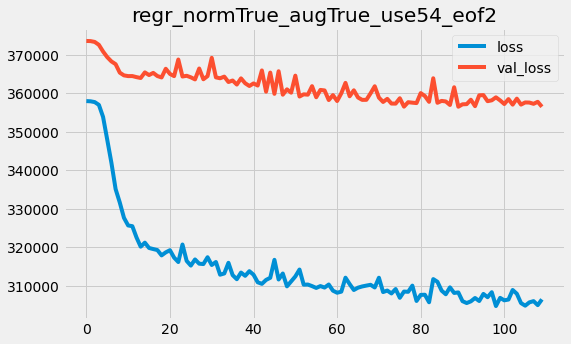

1/1 - 0s - loss: 305597.8125
305597.8125
regr_normTrue_augTrue_use5None_useEOF0


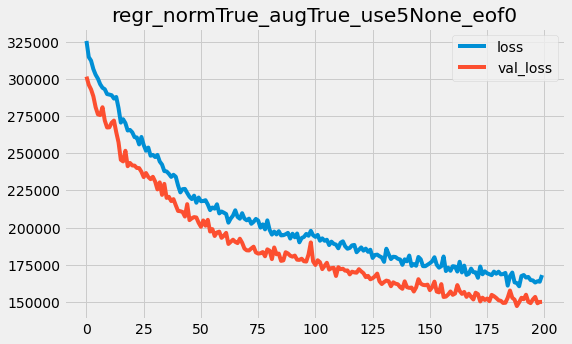

1/1 - 0s - loss: 310108.3438
310108.34375
regr_normTrue_augTrue_use5None_useEOF1


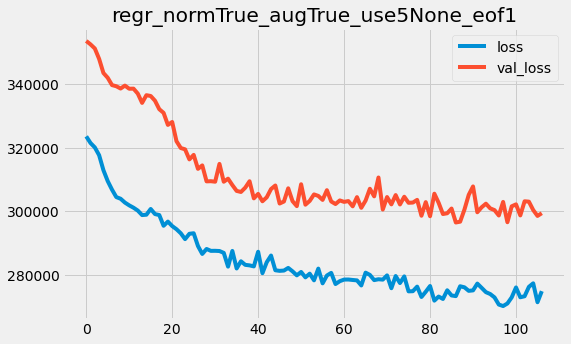

1/1 - 0s - loss: 371644.9062
371644.90625
regr_normTrue_augTrue_use5None_useEOF2


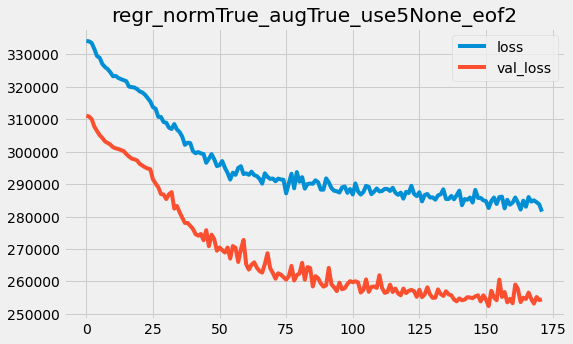

1/1 - 0s - loss: 378037.9062
378037.90625
regr_normTrue_augFalse_use50_useEOF0


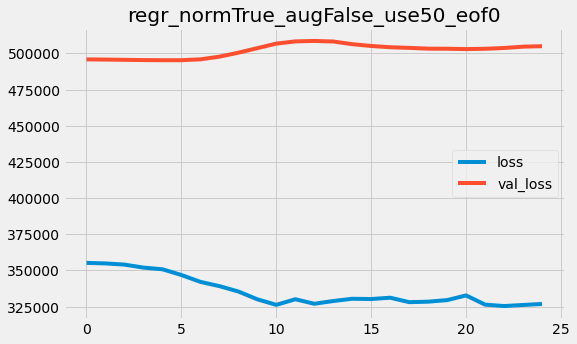

1/1 - 0s - loss: 380774.4688
380774.46875
regr_normTrue_augFalse_use50_useEOF1


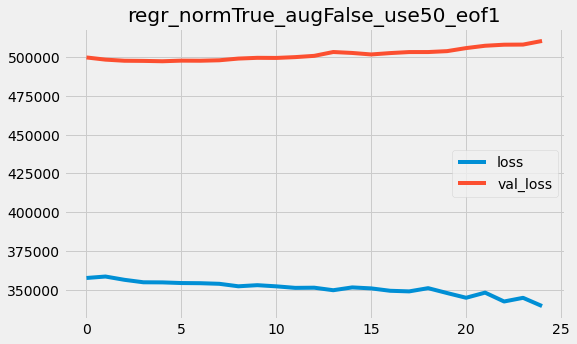

1/1 - 0s - loss: 386631.5938
386631.59375
regr_normTrue_augFalse_use50_useEOF2


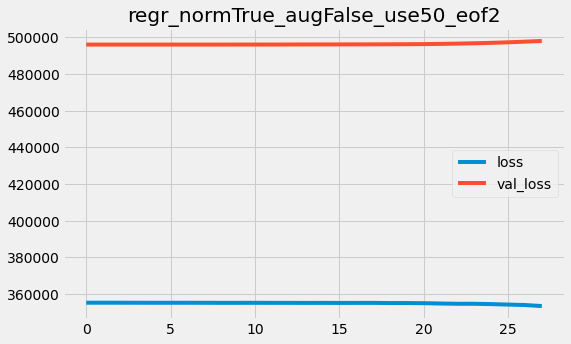

1/1 - 0s - loss: 392240.0312
392240.03125
regr_normTrue_augFalse_use51_useEOF0


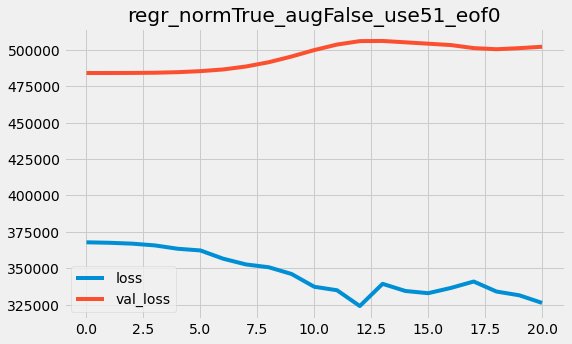

1/1 - 0s - loss: 371428.8125
371428.8125
regr_normTrue_augFalse_use51_useEOF1


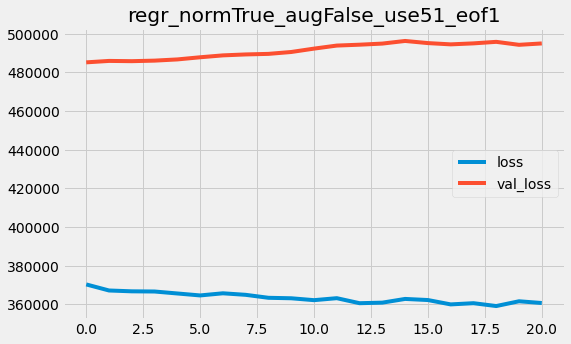

1/1 - 0s - loss: 373296.3750
373296.375
regr_normTrue_augFalse_use51_useEOF2


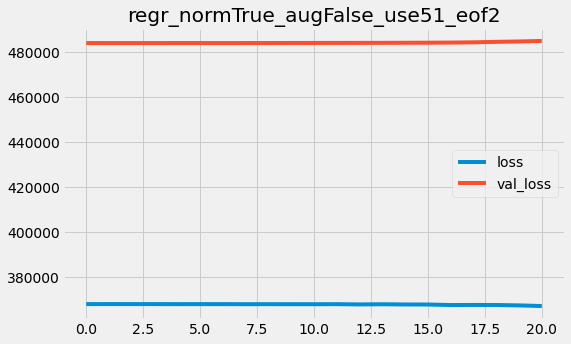

1/1 - 0s - loss: 380118.0312
380118.03125
regr_normTrue_augFalse_use52_useEOF0


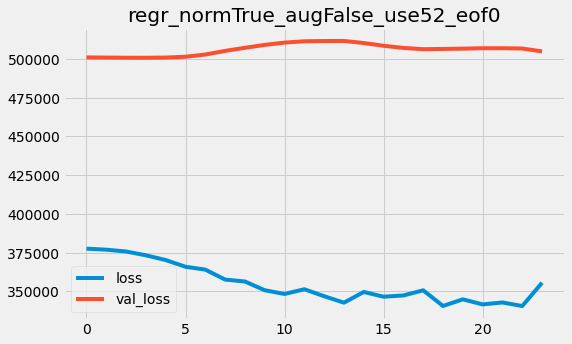

1/1 - 0s - loss: 334339.6875
334339.6875
regr_normTrue_augFalse_use52_useEOF1


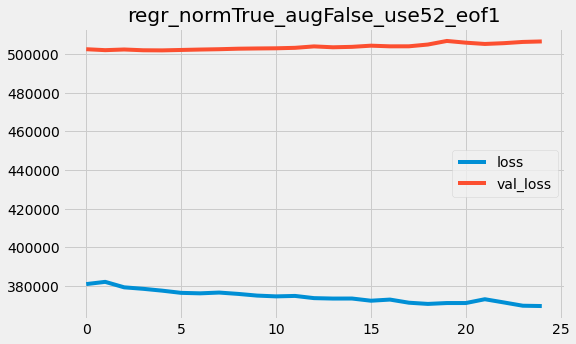

1/1 - 0s - loss: 341068.8750
341068.875
regr_normTrue_augFalse_use52_useEOF2


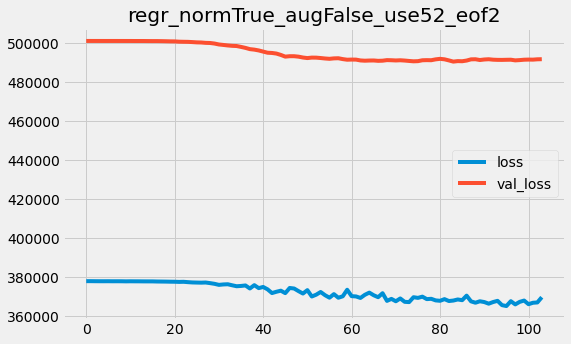

1/1 - 0s - loss: 339595.7812
339595.78125
regr_normTrue_augFalse_use53_useEOF0


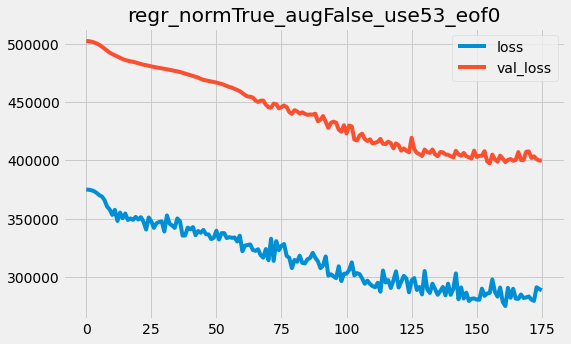

1/1 - 0s - loss: 336749.5312
336749.53125
regr_normTrue_augFalse_use53_useEOF1


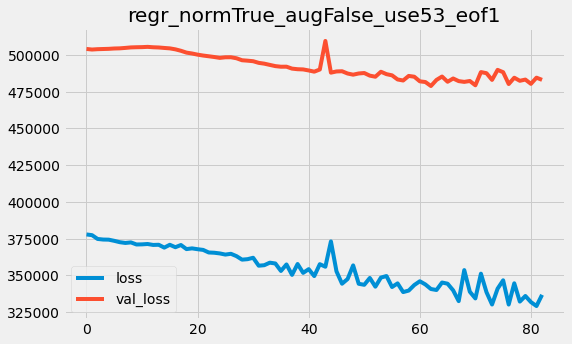

1/1 - 0s - loss: 321666.8750
321666.875
regr_normTrue_augFalse_use53_useEOF2


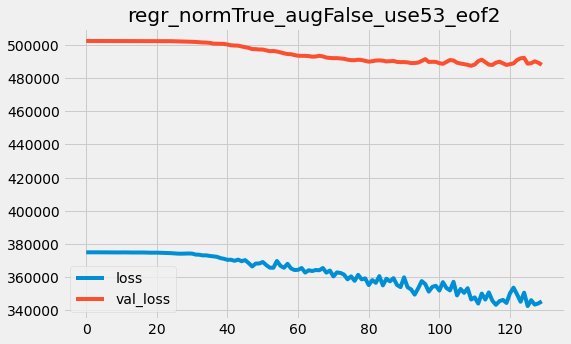

1/1 - 0s - loss: 342481.4062
342481.40625
regr_normTrue_augFalse_use54_useEOF0


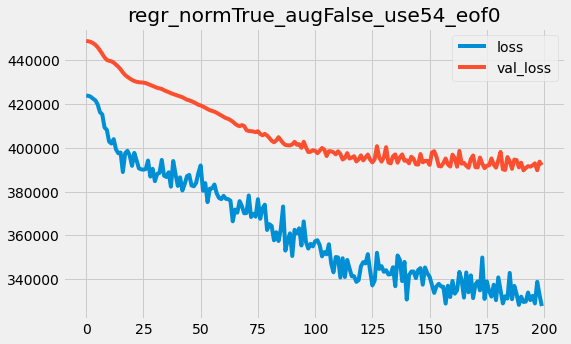

1/1 - 0s - loss: 316667.5312
316667.53125
regr_normTrue_augFalse_use54_useEOF1


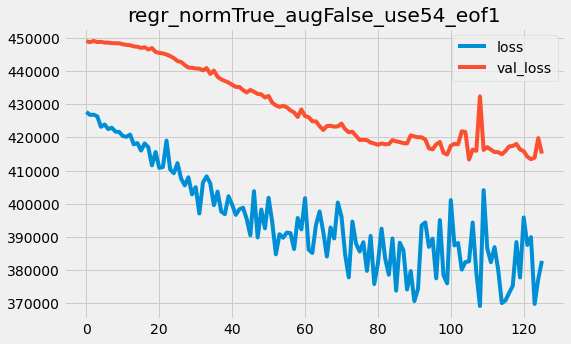

1/1 - 0s - loss: 298466.6562
298466.65625
regr_normTrue_augFalse_use54_useEOF2


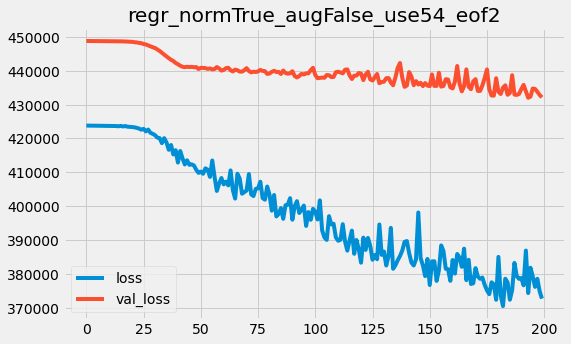

1/1 - 0s - loss: 309045.1875
309045.1875
regr_normTrue_augFalse_use5None_useEOF0


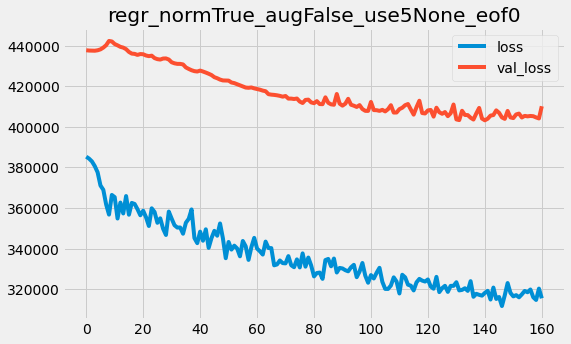

1/1 - 0s - loss: 368932.4375
368932.4375
regr_normTrue_augFalse_use5None_useEOF1


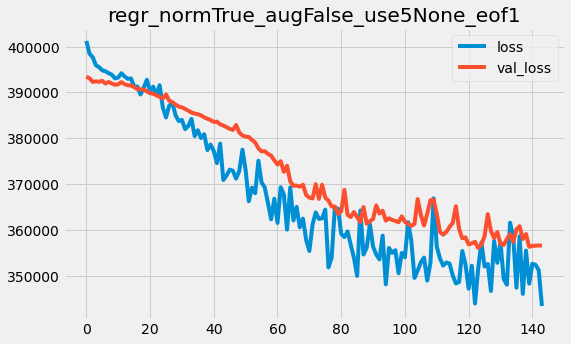

1/1 - 0s - loss: 365189.0938
365189.09375
regr_normTrue_augFalse_use5None_useEOF2


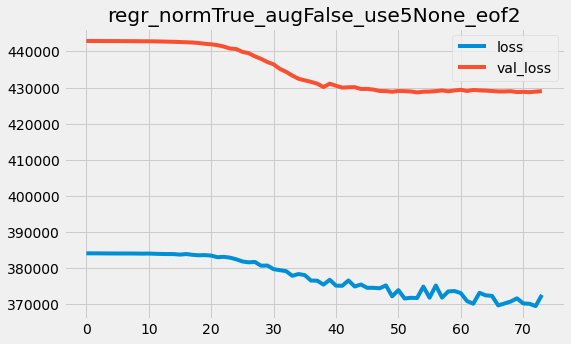

1/1 - 0s - loss: 398983.8438
398983.84375
regr_normFalse_augTrue_use50_useEOF0


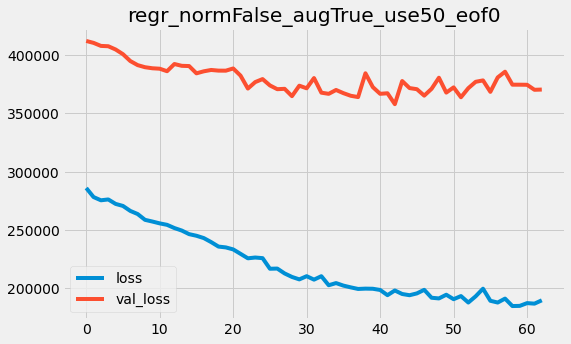

1/1 - 0s - loss: 350788.9062
350788.90625
regr_normFalse_augTrue_use50_useEOF1


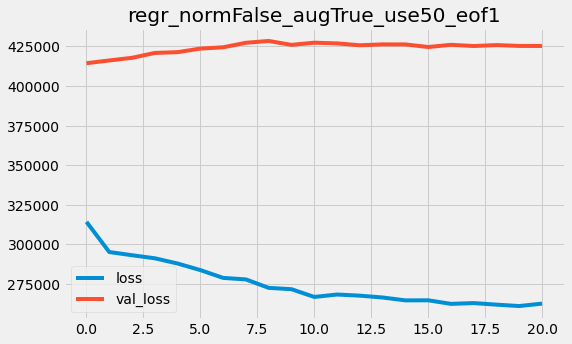

1/1 - 0s - loss: 382667.7812
382667.78125
regr_normFalse_augTrue_use50_useEOF2


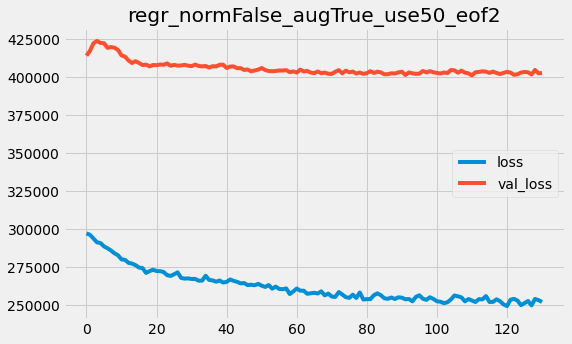

1/1 - 0s - loss: 380638.8750
380638.875
regr_normFalse_augTrue_use51_useEOF0


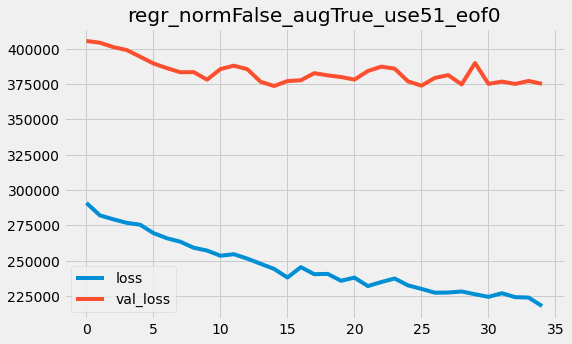

1/1 - 0s - loss: 364040.0000
364040.0
regr_normFalse_augTrue_use51_useEOF1


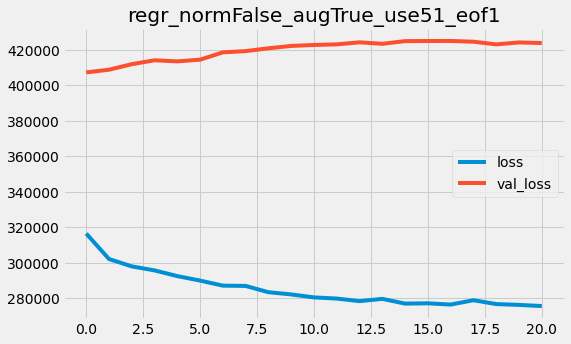

1/1 - 0s - loss: 379787.0312
379787.03125
regr_normFalse_augTrue_use51_useEOF2


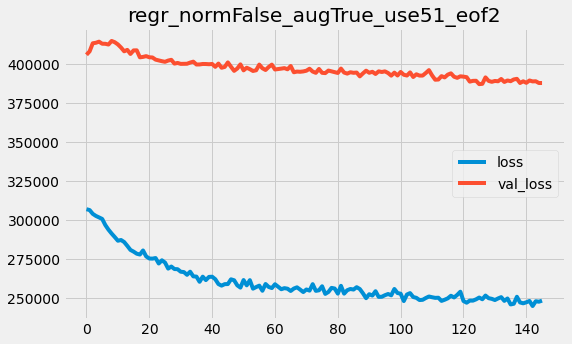

1/1 - 0s - loss: 370573.5312
370573.53125
regr_normFalse_augTrue_use52_useEOF0


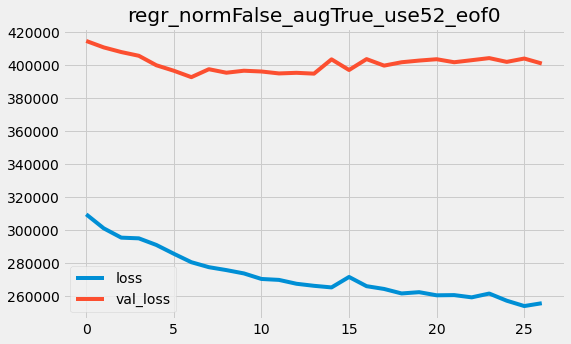

1/1 - 0s - loss: 336763.0000
336763.0
regr_normFalse_augTrue_use52_useEOF1


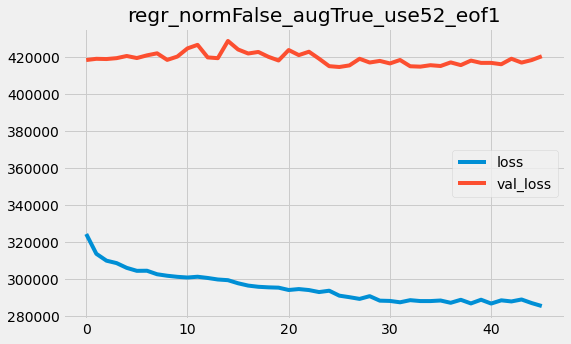

1/1 - 0s - loss: 342782.9688
342782.96875
regr_normFalse_augTrue_use52_useEOF2


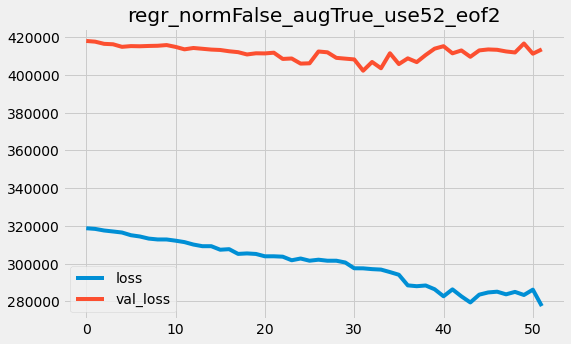

1/1 - 0s - loss: 333460.1875
333460.1875
regr_normFalse_augTrue_use53_useEOF0


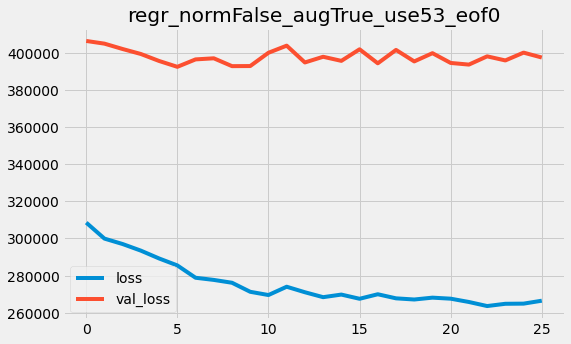

1/1 - 0s - loss: 343193.0625
343193.0625
regr_normFalse_augTrue_use53_useEOF1


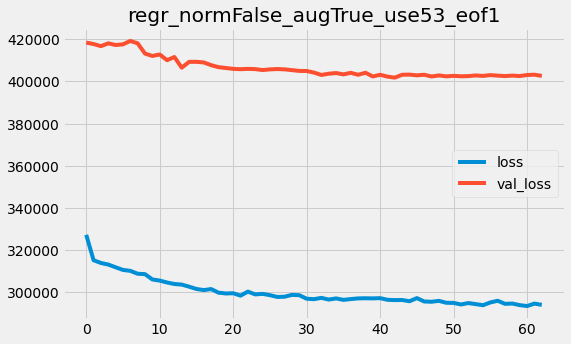

1/1 - 0s - loss: 338696.8438
338696.84375
regr_normFalse_augTrue_use53_useEOF2


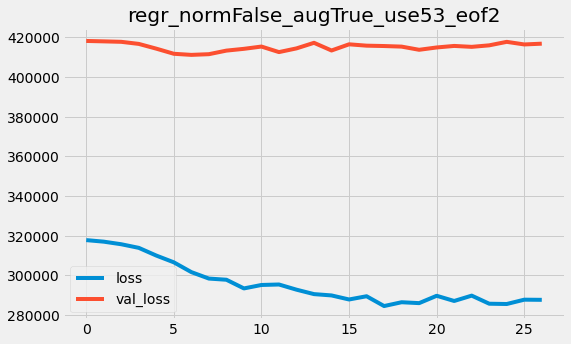

1/1 - 0s - loss: 336596.4688
336596.46875
regr_normFalse_augTrue_use54_useEOF0


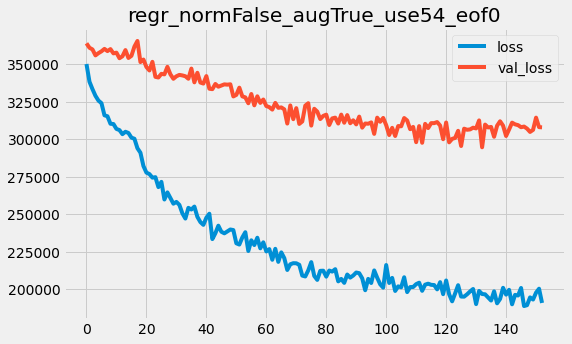

1/1 - 0s - loss: 314019.0625
314019.0625
regr_normFalse_augTrue_use54_useEOF1


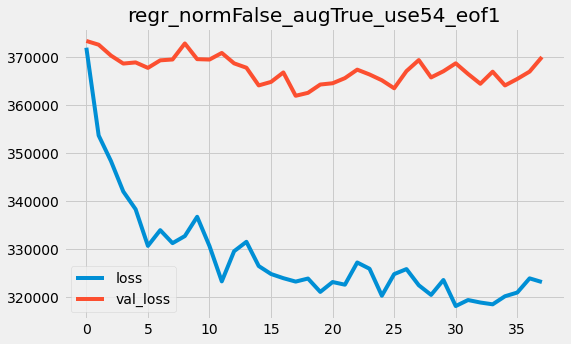

1/1 - 0s - loss: 306885.9375
306885.9375
regr_normFalse_augTrue_use54_useEOF2


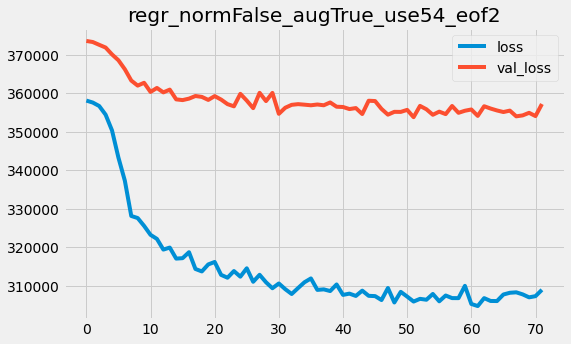

1/1 - 0s - loss: 306580.8750
306580.875
regr_normFalse_augTrue_use5None_useEOF0


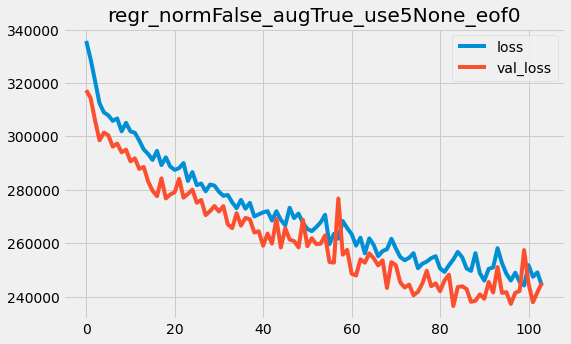

1/1 - 0s - loss: 301955.5625
301955.5625
regr_normFalse_augTrue_use5None_useEOF1


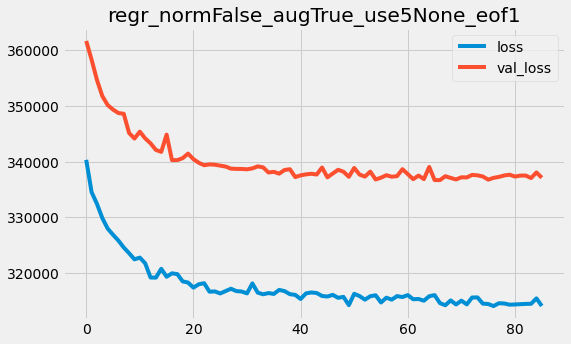

1/1 - 0s - loss: 346070.8438
346070.84375
regr_normFalse_augTrue_use5None_useEOF2


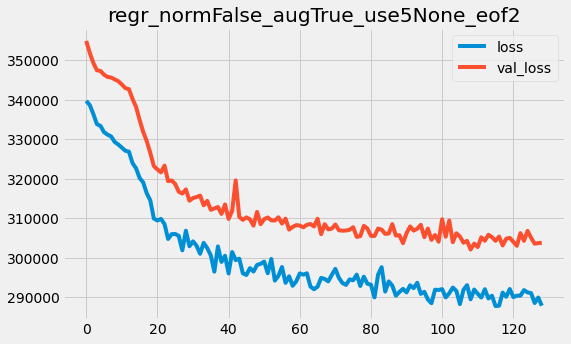

1/1 - 0s - loss: 323642.2812
323642.28125
regr_normFalse_augFalse_use50_useEOF0


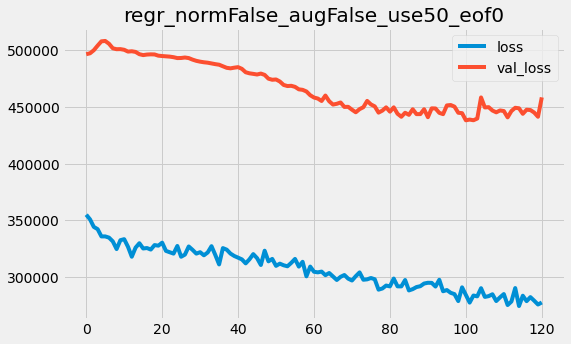

1/1 - 0s - loss: 371629.4062
371629.40625
regr_normFalse_augFalse_use50_useEOF1


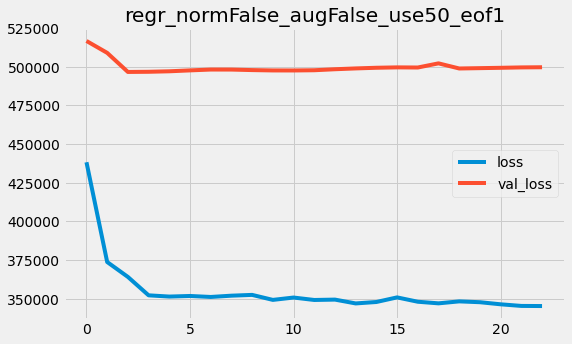

1/1 - 0s - loss: 385791.1250
385791.125
regr_normFalse_augFalse_use50_useEOF2


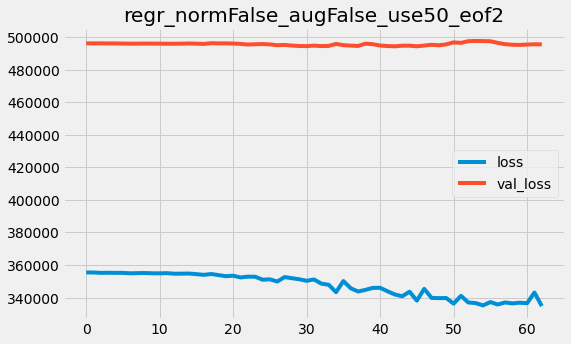

1/1 - 0s - loss: 385771.8750
385771.875
regr_normFalse_augFalse_use51_useEOF0


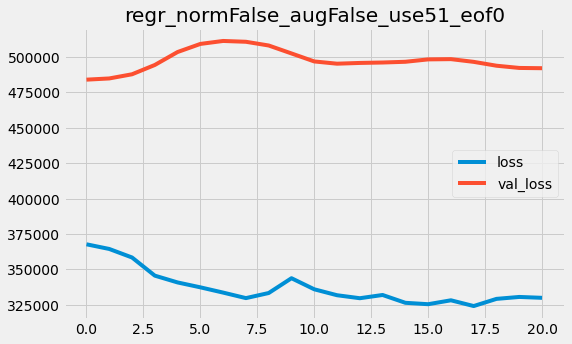

1/1 - 0s - loss: 370445.3438
370445.34375
regr_normFalse_augFalse_use51_useEOF1


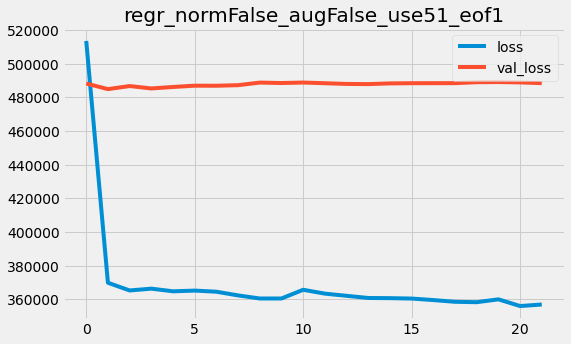

1/1 - 0s - loss: 373053.3438
373053.34375
regr_normFalse_augFalse_use51_useEOF2


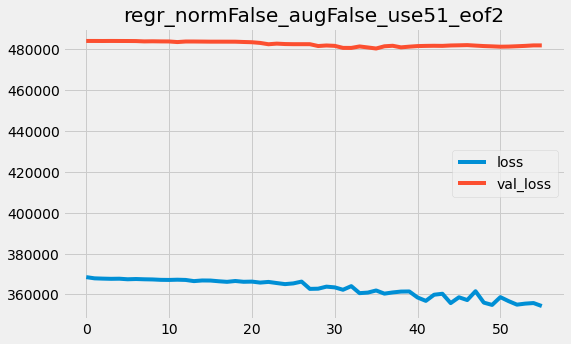

1/1 - 0s - loss: 372295.7188
372295.71875
regr_normFalse_augFalse_use52_useEOF0


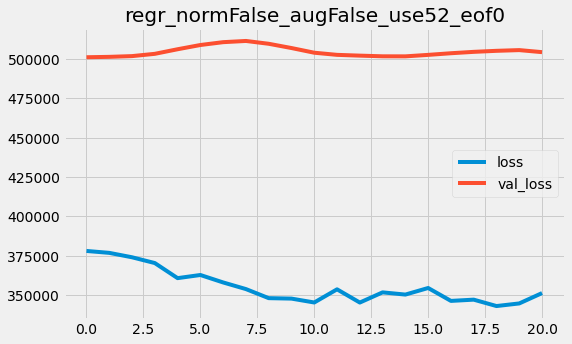

1/1 - 0s - loss: 334243.6562
334243.65625
regr_normFalse_augFalse_use52_useEOF1


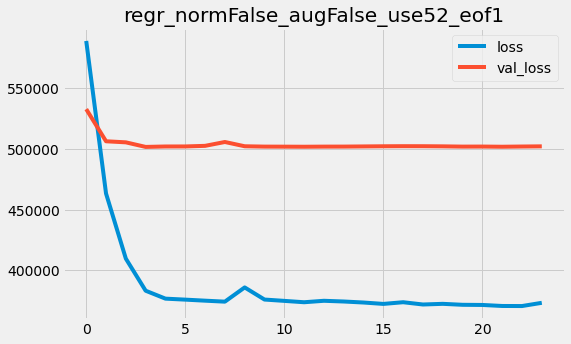

1/1 - 0s - loss: 344001.5312
344001.53125
regr_normFalse_augFalse_use52_useEOF2


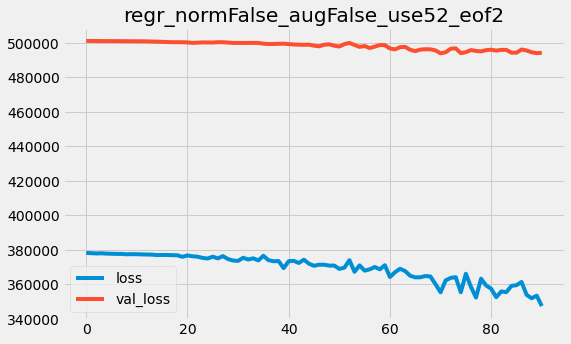

1/1 - 0s - loss: 337177.4688
337177.46875
regr_normFalse_augFalse_use53_useEOF0


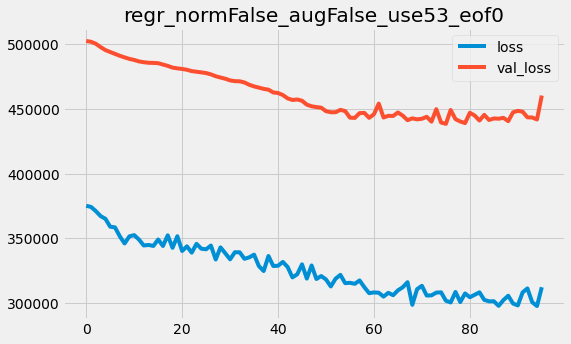

1/1 - 0s - loss: 335725.6250
335725.625
regr_normFalse_augFalse_use53_useEOF1


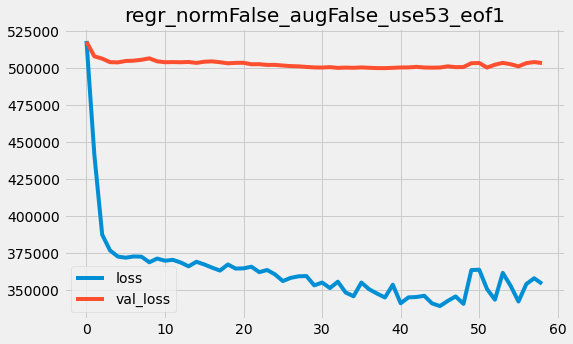

1/1 - 0s - loss: 339323.2812
339323.28125
regr_normFalse_augFalse_use53_useEOF2


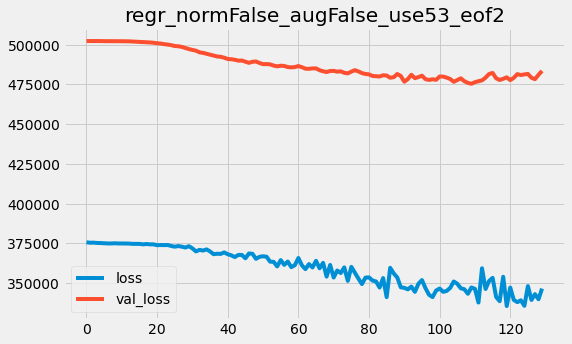

1/1 - 0s - loss: 336480.4688
336480.46875
regr_normFalse_augFalse_use54_useEOF0


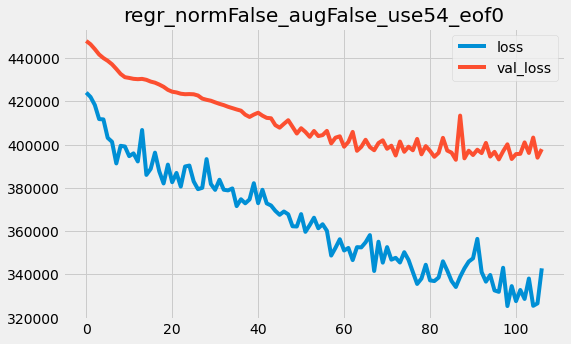

1/1 - 0s - loss: 318048.6875
318048.6875
regr_normFalse_augFalse_use54_useEOF1


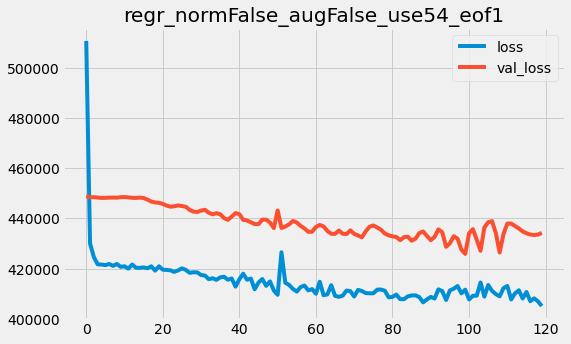

1/1 - 0s - loss: 303438.1875
303438.1875
regr_normFalse_augFalse_use54_useEOF2


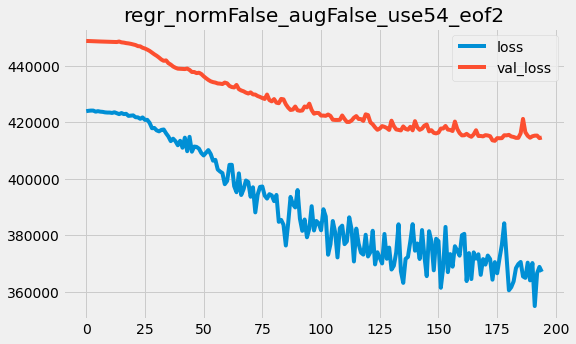

1/1 - 0s - loss: 311502.3750
311502.375
regr_normFalse_augFalse_use5None_useEOF0


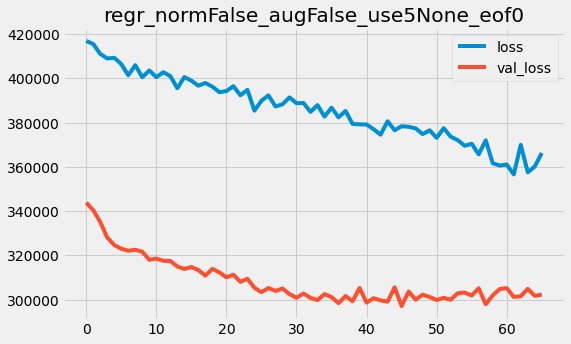

1/1 - 0s - loss: 320397.0625
320397.0625
regr_normFalse_augFalse_use5None_useEOF1


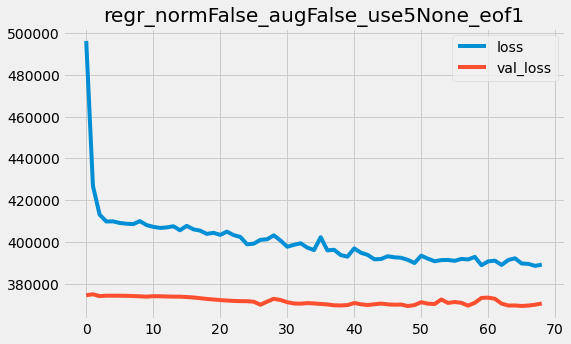

1/1 - 0s - loss: 358246.6562
358246.65625
regr_normFalse_augFalse_use5None_useEOF2


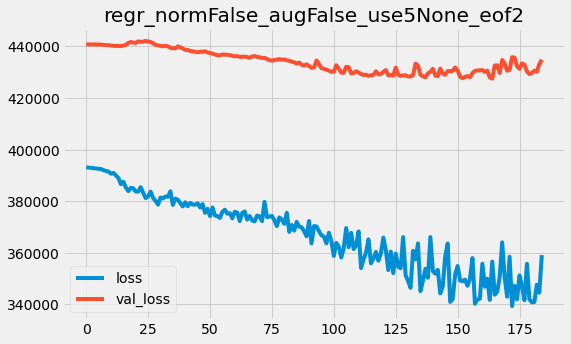

1/1 - 0s - loss: 357527.1875
357527.1875
class_normTrue_augFalse_use50_useEOF0


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


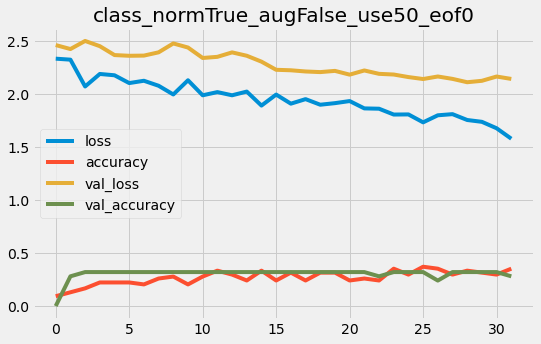

1/1 - 0s - loss: 1.7810 - accuracy: 0.3000
[1.7809696197509766, 0.30000001192092896]
class_normTrue_augFalse_use50_useEOF1


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


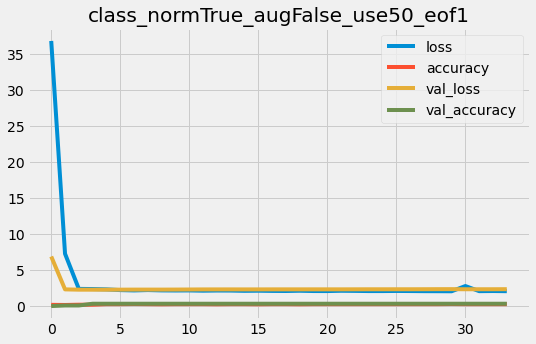

1/1 - 0s - loss: 2.2254 - accuracy: 0.1333
[2.225370168685913, 0.13333334028720856]
class_normTrue_augFalse_use50_useEOF2


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


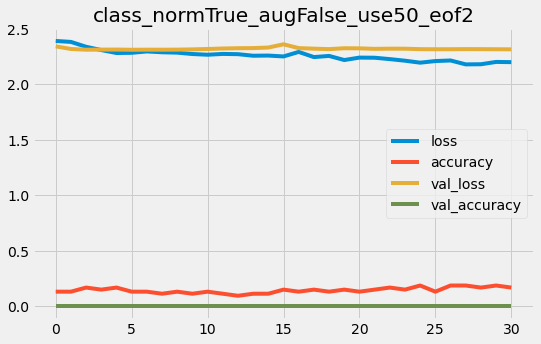

1/1 - 0s - loss: 2.1225 - accuracy: 0.2667
[2.122495174407959, 0.2666666805744171]
class_normTrue_augFalse_use51_useEOF0


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


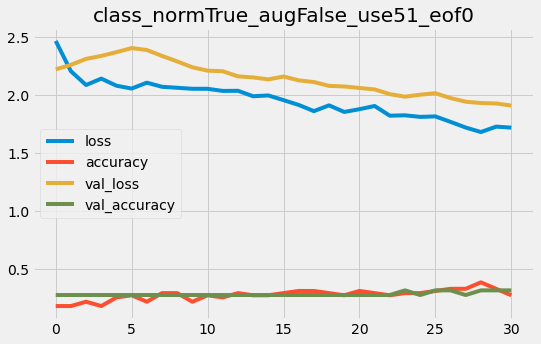

1/1 - 0s - loss: 1.8488 - accuracy: 0.3000
[1.8487739562988281, 0.30000001192092896]
class_normTrue_augFalse_use51_useEOF1


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


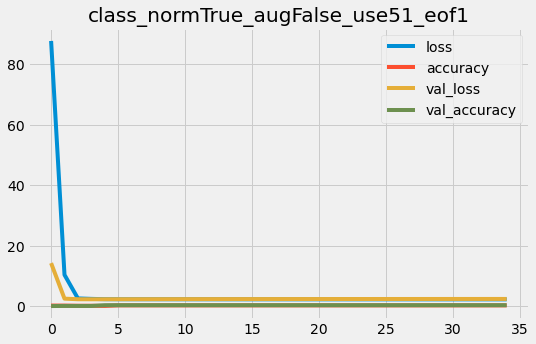

1/1 - 0s - loss: 2.3099 - accuracy: 0.1000
[2.3098998069763184, 0.10000000149011612]
class_normTrue_augFalse_use51_useEOF2


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


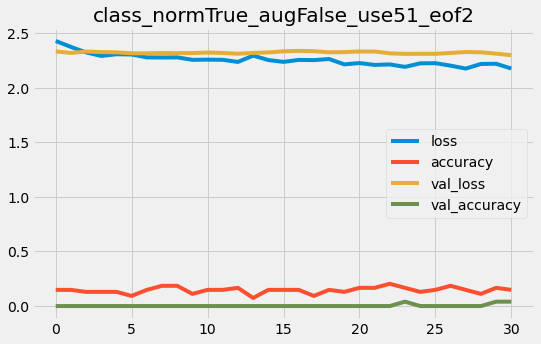

1/1 - 0s - loss: 2.1128 - accuracy: 0.3000
[2.112783193588257, 0.30000001192092896]
class_normTrue_augFalse_use52_useEOF0


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


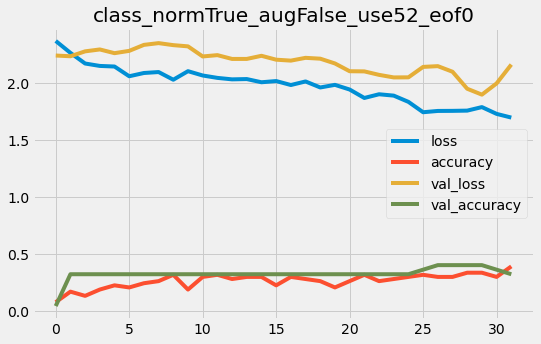

1/1 - 0s - loss: 1.7975 - accuracy: 0.2667
[1.797485589981079, 0.2666666805744171]
class_normTrue_augFalse_use52_useEOF1


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


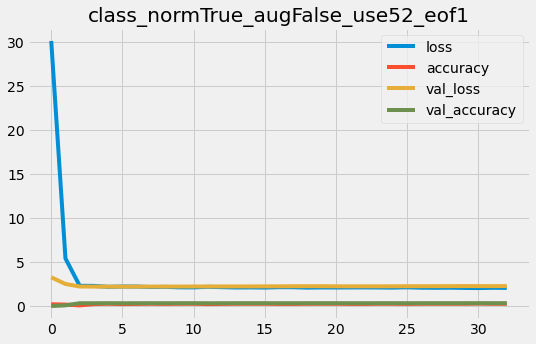

1/1 - 0s - loss: 2.3287 - accuracy: 0.2000
[2.328697919845581, 0.20000000298023224]
class_normTrue_augFalse_use52_useEOF2


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


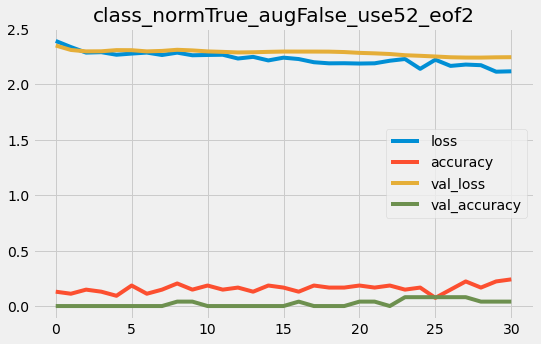

1/1 - 0s - loss: 2.1039 - accuracy: 0.3000
[2.1038968563079834, 0.30000001192092896]
class_normTrue_augFalse_use53_useEOF0


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


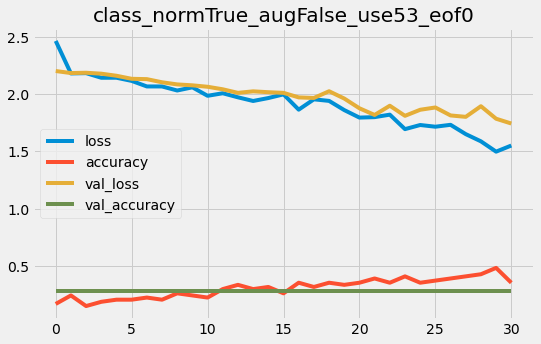

1/1 - 0s - loss: 1.6267 - accuracy: 0.4333
[1.6266638040542603, 0.4333333373069763]
class_normTrue_augFalse_use53_useEOF1


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


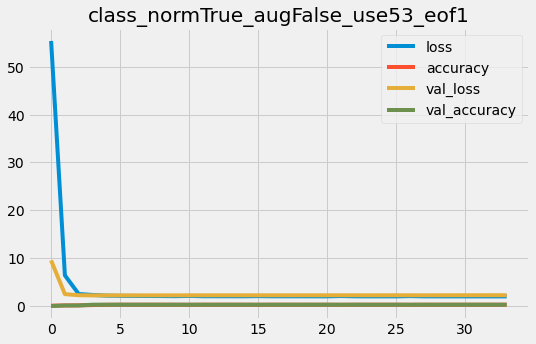

1/1 - 0s - loss: 2.9233 - accuracy: 0.2000
[2.9232537746429443, 0.20000000298023224]
class_normTrue_augFalse_use53_useEOF2


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


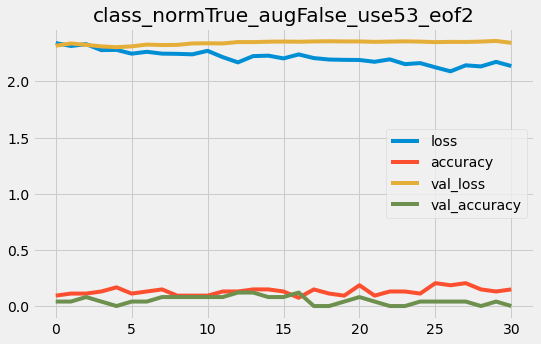

1/1 - 0s - loss: 2.1895 - accuracy: 0.3000
[2.1894917488098145, 0.30000001192092896]
class_normTrue_augFalse_use54_useEOF0


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


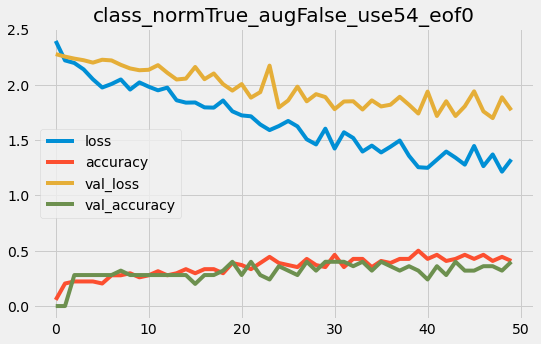

1/1 - 0s - loss: 2.3285 - accuracy: 0.2333
[2.328516960144043, 0.23333333432674408]
class_normTrue_augFalse_use54_useEOF1


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


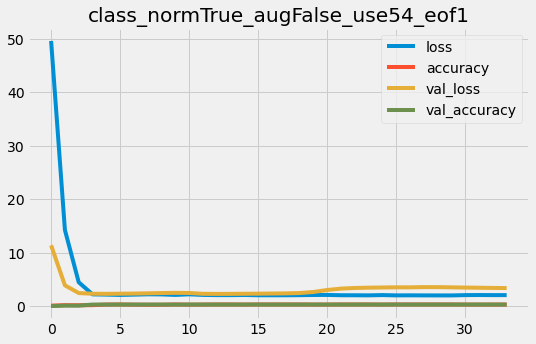

1/1 - 0s - loss: 2.5347 - accuracy: 0.1000
[2.534677028656006, 0.10000000149011612]
class_normTrue_augFalse_use54_useEOF2


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


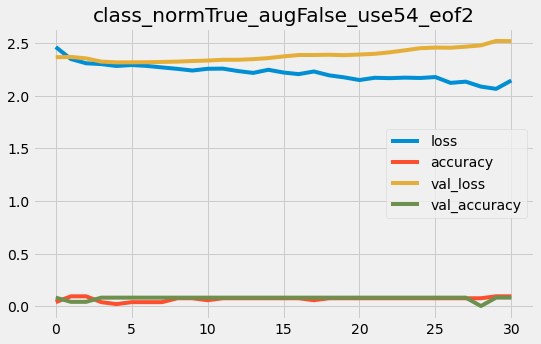

1/1 - 0s - loss: 2.2126 - accuracy: 0.1667
[2.212606191635132, 0.1666666716337204]
class_normTrue_augFalse_use5None_useEOF0


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


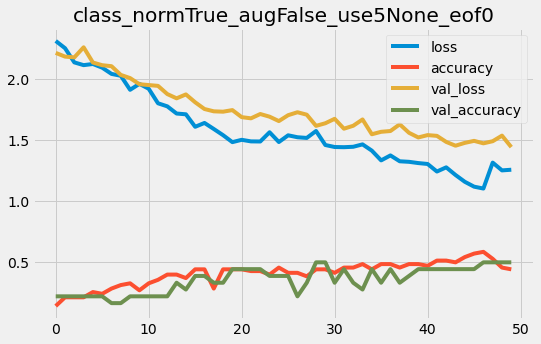

1/1 - 0s - loss: 1.6068 - accuracy: 0.4286
[1.60675048828125, 0.4285714328289032]
class_normTrue_augFalse_use5None_useEOF1


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


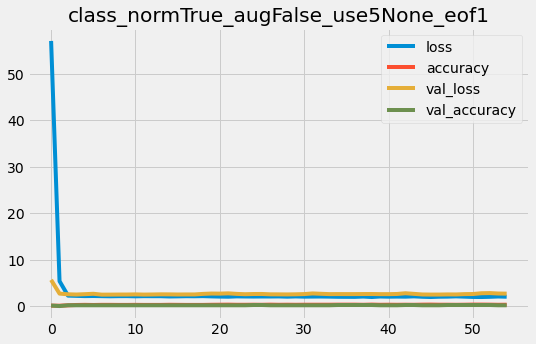

1/1 - 0s - loss: 2.6210 - accuracy: 0.1905
[2.6209583282470703, 0.190476194024086]
class_normTrue_augFalse_use5None_useEOF2


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


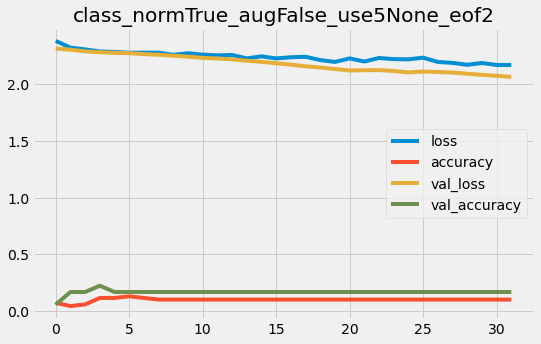

1/1 - 0s - loss: 2.3421 - accuracy: 0.0000e+00
[2.342132091522217, 0.0]
class_normFalse_augFalse_use50_useEOF0


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


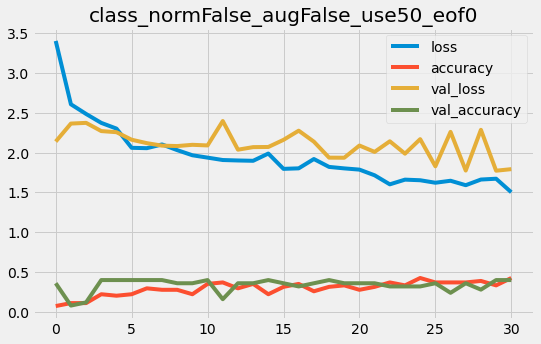

1/1 - 0s - loss: 1.6931 - accuracy: 0.3000
[1.6930828094482422, 0.30000001192092896]
class_normFalse_augFalse_use50_useEOF1


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


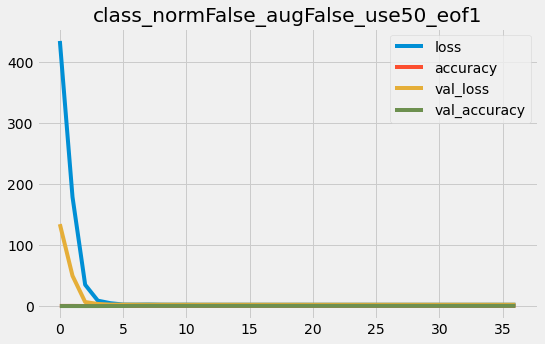

1/1 - 0s - loss: 3.3460 - accuracy: 0.2333
[3.345975160598755, 0.23333333432674408]
class_normFalse_augFalse_use50_useEOF2


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


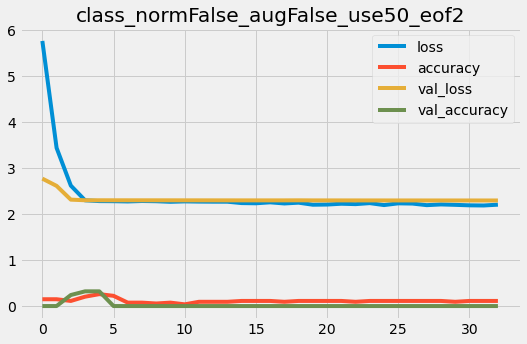

1/1 - 0s - loss: 2.1088 - accuracy: 0.1333
[2.1088173389434814, 0.13333334028720856]
class_normFalse_augFalse_use51_useEOF0


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


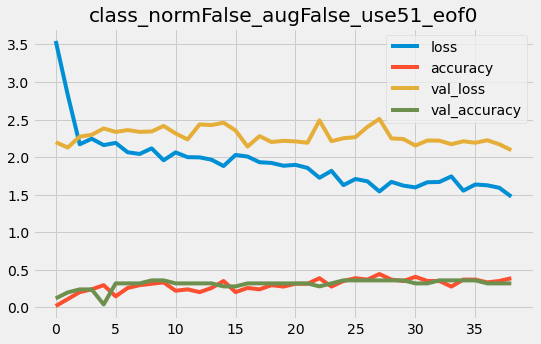

1/1 - 0s - loss: 1.8570 - accuracy: 0.3000
[1.8570053577423096, 0.30000001192092896]
class_normFalse_augFalse_use51_useEOF1


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


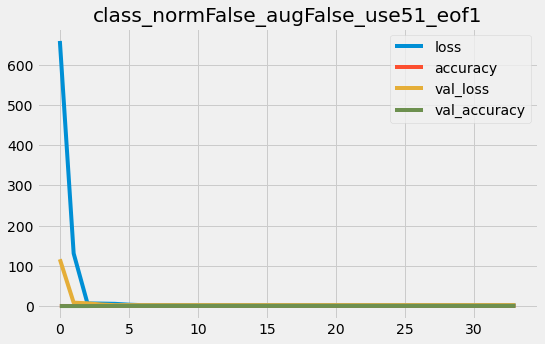

1/1 - 0s - loss: 3.3386 - accuracy: 0.2000
[3.3386378288269043, 0.20000000298023224]
class_normFalse_augFalse_use51_useEOF2


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


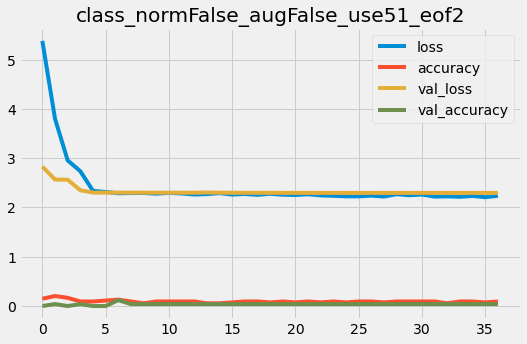

1/1 - 0s - loss: 2.1513 - accuracy: 0.1333
[2.1513049602508545, 0.13333334028720856]
class_normFalse_augFalse_use52_useEOF0


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


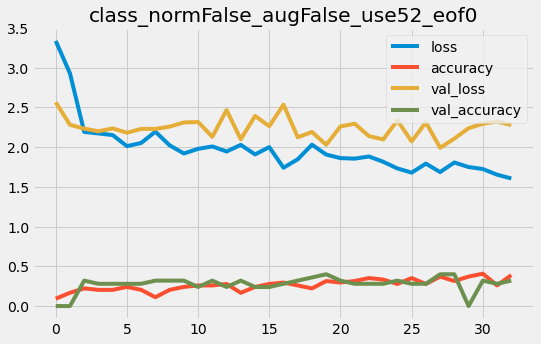

1/1 - 0s - loss: 2.0103 - accuracy: 0.3667
[2.0103018283843994, 0.36666667461395264]
class_normFalse_augFalse_use52_useEOF1


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


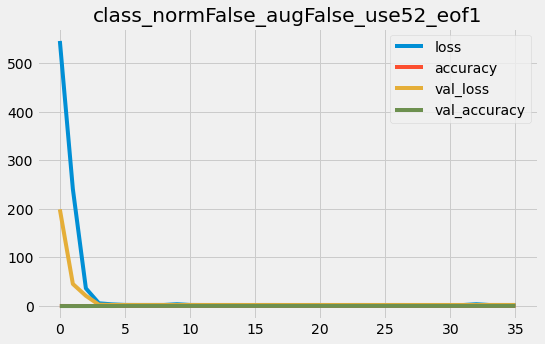

1/1 - 0s - loss: 2.1588 - accuracy: 0.2000
[2.1587655544281006, 0.20000000298023224]
class_normFalse_augFalse_use52_useEOF2


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


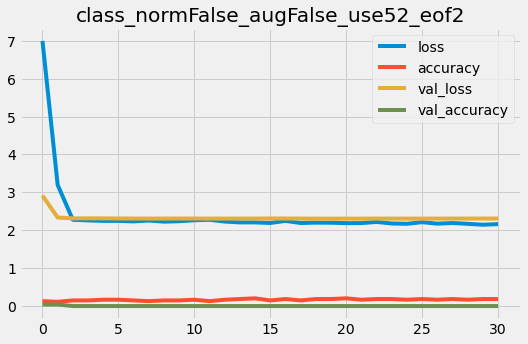

1/1 - 0s - loss: 2.1447 - accuracy: 0.2667
[2.1446855068206787, 0.2666666805744171]
class_normFalse_augFalse_use53_useEOF0


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


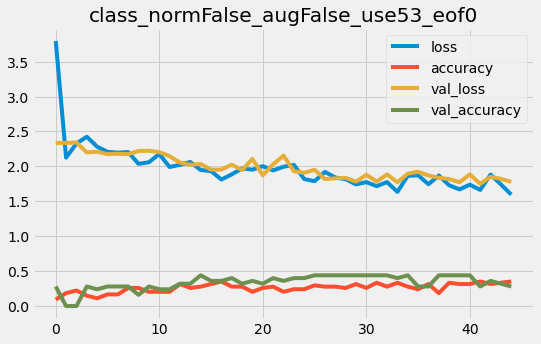

1/1 - 0s - loss: 2.0075 - accuracy: 0.3000
[2.00752854347229, 0.30000001192092896]
class_normFalse_augFalse_use53_useEOF1


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


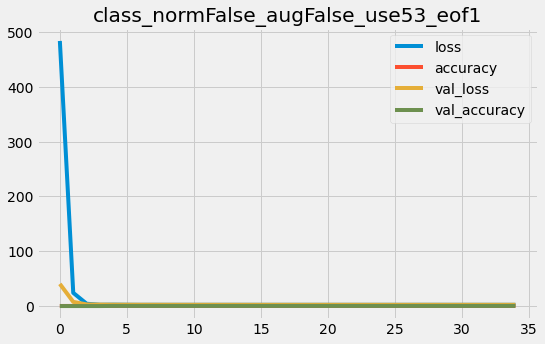

1/1 - 0s - loss: 6.0553 - accuracy: 0.2333
[6.0553059577941895, 0.23333333432674408]
class_normFalse_augFalse_use53_useEOF2


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


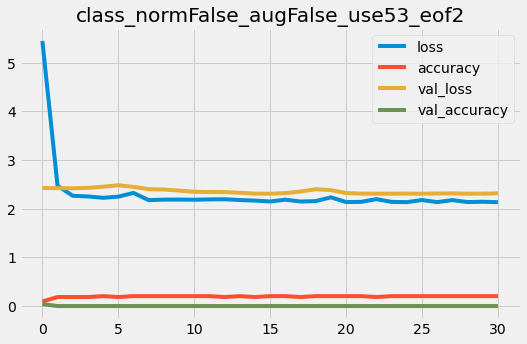

1/1 - 0s - loss: 2.3233 - accuracy: 0.2333
[2.323317050933838, 0.23333333432674408]
class_normFalse_augFalse_use54_useEOF0


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


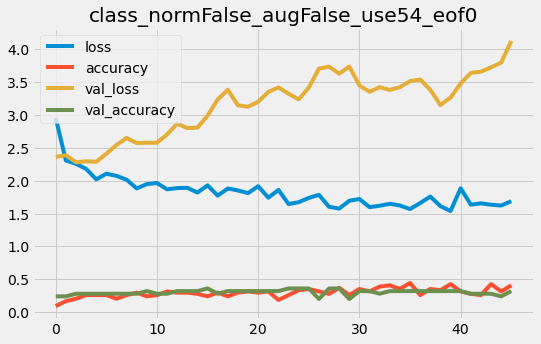

1/1 - 0s - loss: 2.5449 - accuracy: 0.0667
[2.544903039932251, 0.06666667014360428]
class_normFalse_augFalse_use54_useEOF1


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


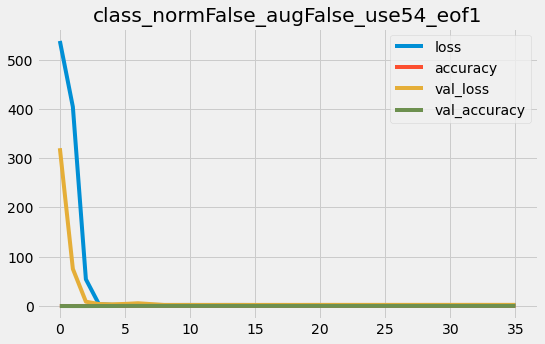

1/1 - 0s - loss: 2.9868 - accuracy: 0.2000
[2.986786365509033, 0.20000000298023224]
class_normFalse_augFalse_use54_useEOF2


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


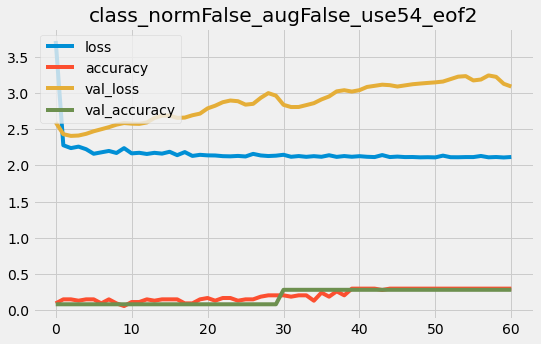

1/1 - 0s - loss: 2.2358 - accuracy: 0.2000
[2.2358431816101074, 0.20000000298023224]
class_normFalse_augFalse_use5None_useEOF0


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


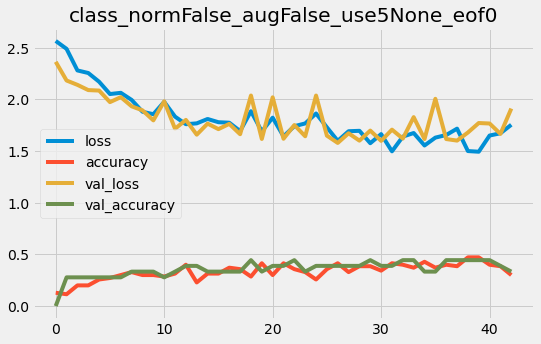

1/1 - 0s - loss: 1.5667 - accuracy: 0.4286
[1.5666625499725342, 0.4285714328289032]
class_normFalse_augFalse_use5None_useEOF1


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


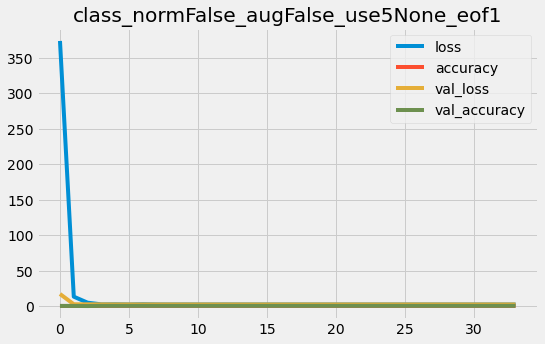

1/1 - 0s - loss: 2.2213 - accuracy: 0.1905
[2.221320629119873, 0.190476194024086]
class_normFalse_augFalse_use5None_useEOF2


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


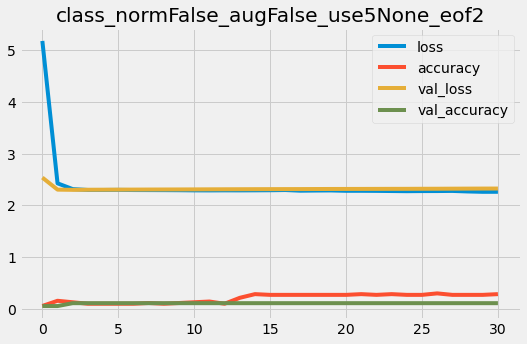

1/1 - 0s - loss: 2.2497 - accuracy: 0.2857
[2.2496657371520996, 0.2857142984867096]


In [ ]:
pd.set_option('max_colwidth', 100)
d = {'Name': [], 'params': [], 'loss': [], 'accuracy': [], 'val_loss': [], 'val_accuracy': [], 'test_loss': [], 'test_accuracy': []}
df_class = pd.DataFrame(data=d)

d = {'Name': [], 'params': [], 'loss': [], 'val_loss': [], 'test_loss': []}
df_regr = pd.DataFrame(data=d)



for li_m in range(len(list_regr)):
  m_stri = post_list_regr[li_m]
  for uE in list(range(3)):
    print(m_stri + '_useEOF' + str(uE))
    exec('df_regr, ' + m_stri + '_useEOF' + str(uE) + ' = train_model(eofs, df_regr, list_regr, post_list_regr, li_m, type_m = "regr", useEOF = ' + str(uE) + ')')


for li_m in range(len(list_class)):
  m_stri = post_list_class[li_m]
  for uE in list(range(3)):
    print(m_stri + '_useEOF' + str(uE))
    exec('df_class, ' + m_stri + '_useEOF' + str(uE) + ' = train_model(eofs, df_class, list_class, post_list_class, li_m, type_m = "class", useEOF = ' + str(uE) + ')')




# Оценка результатов.


Сравнение класса с наибольшей вероятностью (для модели классификации) и класса, наибольшим по модую значением оценки компонет (для регрессии). Названия моделей выведены над графиками в предыдущем блоке. Ниже пример для рандомной пары

In [ ]:
pred_res = regr_normTrue_augFalse_use5None_useEOF0.predict(np.asarray(trsgi_values))
pred_class = class_normTrue_augFalse_use5None_useEOF0.predict(np.asarray(trsgi_values))
for i_t in range(len(pred_res)):
  print(i_t, np.square(pred_res[i_t]).argmax(),
        pred_class[i_t].argmax())

Визуальная проверка предсказаний модели для определенного года. Для классификации выводится функция EOF с наибольшей вероятностью. <br>
Пока что это beta-версия, потому что не удается получить исходные значения при обратной трансформации из EOF и компонент в значения PDSI

In [ ]:
plt.rcParams["figure.figsize"] = [10, 10]
regr_graph_check(year = 30, base_year = 1901, df_data = df_data, ds_n = ds_n, pcs = pred_res, eofs = eofs, type_f = 'Both')
class_graph_check(year = 30, base_year = 1901, df_data = df_data, ds_n = ds_n, pcs = pred_class, eofs = eofs, type_f = 'Both')


Графический вывод. Сравнение валидационных показателей по моделям

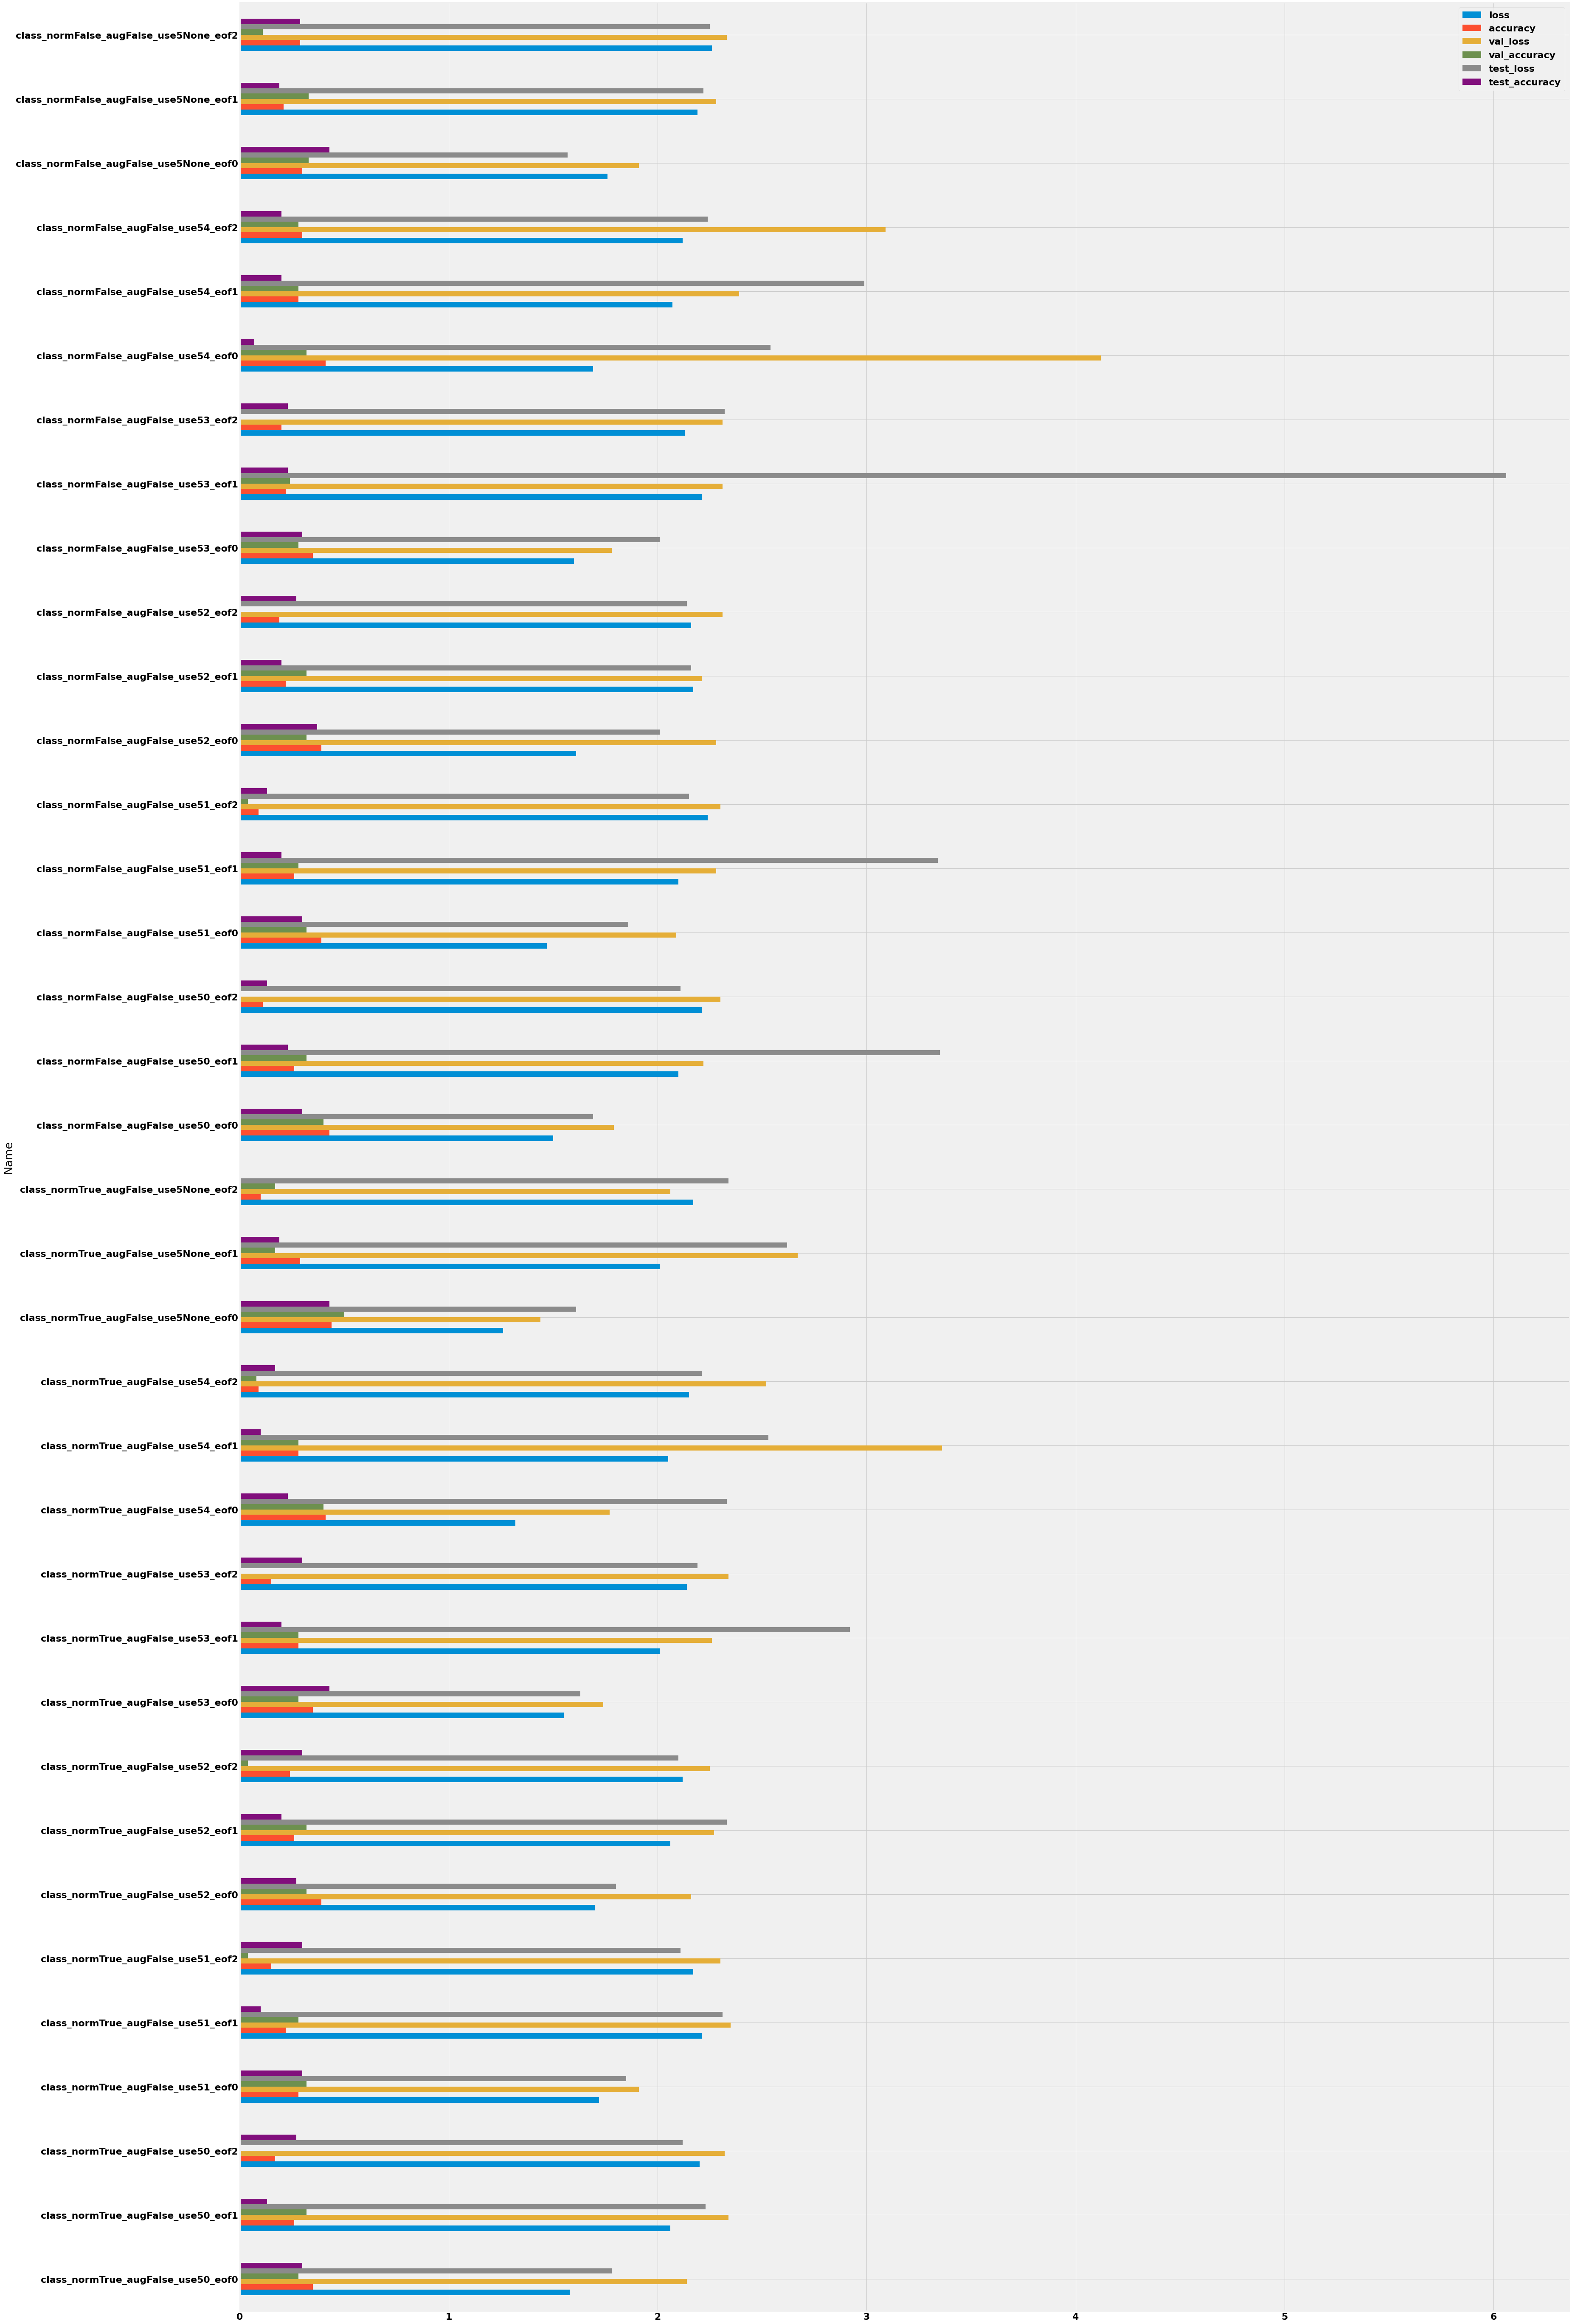

In [ ]:
%matplotlib inline
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

plt.rcParams["figure.figsize"] = [50, 100]
df_class.plot.barh(x= 'Name')

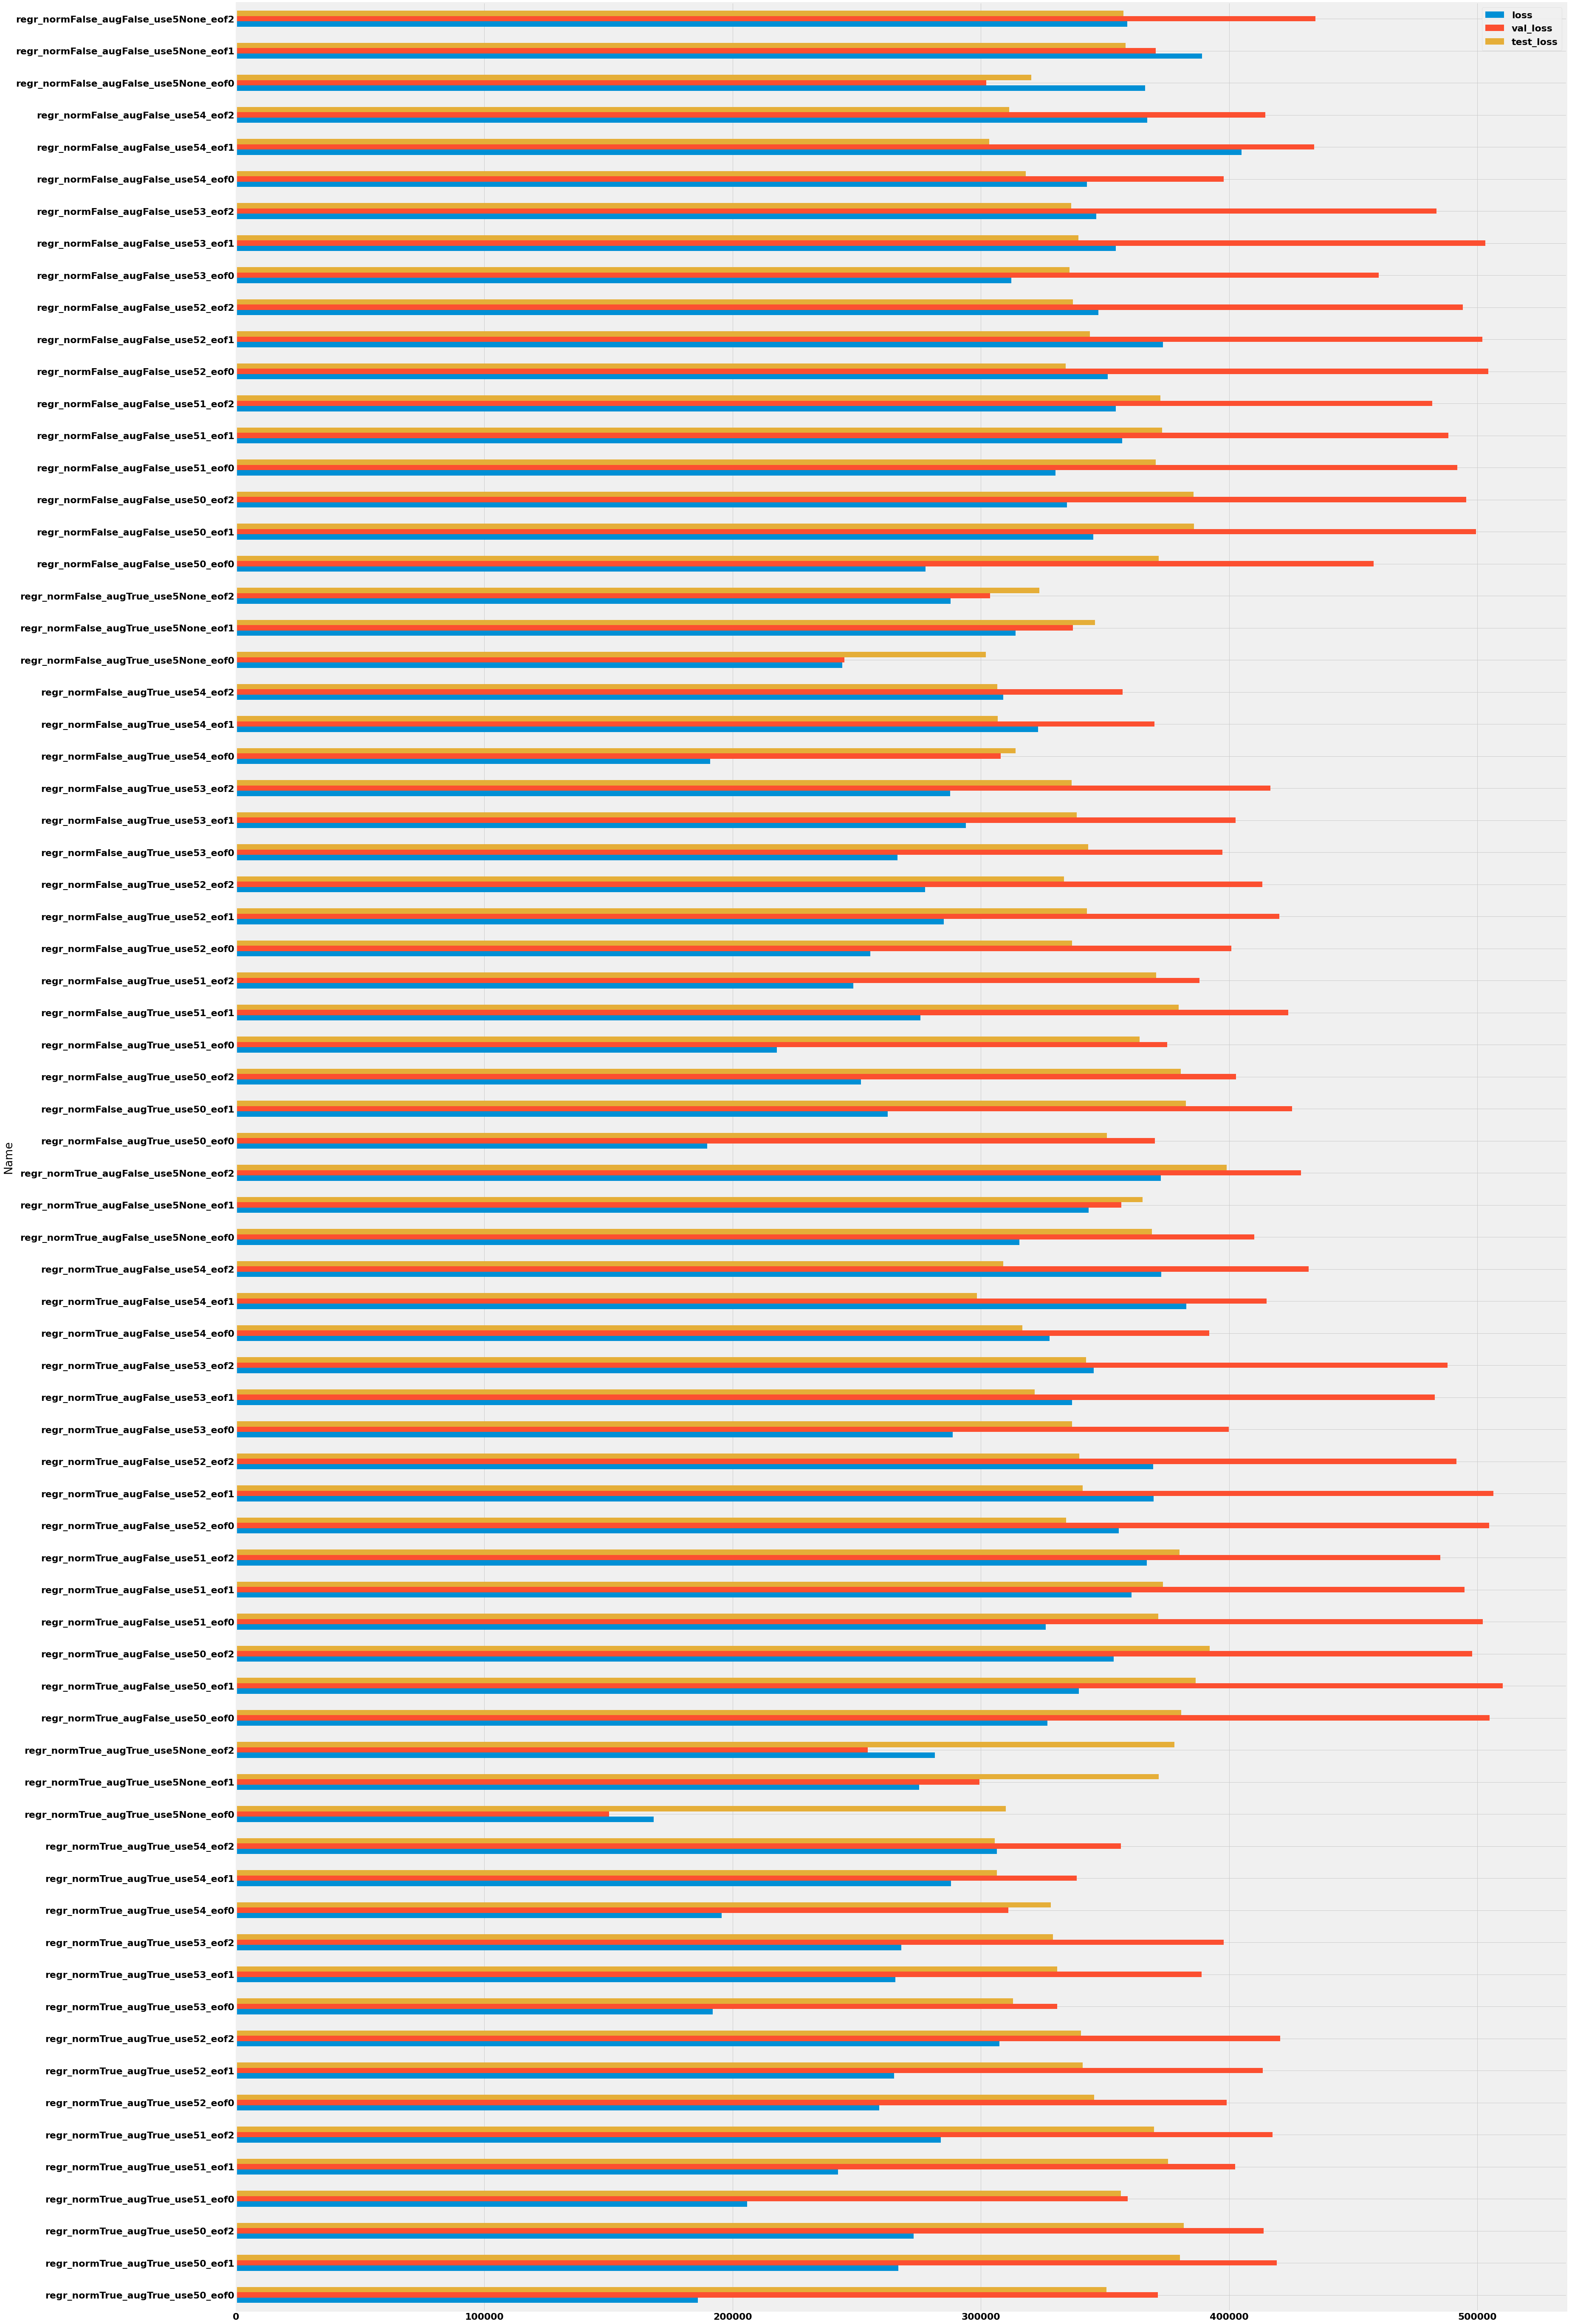

In [ ]:
plt.rcParams["figure.figsize"] = [50, 100]
df_regr.plot.barh(x= 'Name')
